## Business Understanding

When a client applies for a loan, there are four types of decisions that could be taken by the (client/company):
* Approved: The Company has approved loan Application.
* Cancelled: The client cancelled the application sometime during approval.
* Refused: The company has rejected the loan.
* Unused offer:  Loan has been cancelled by the client but on different stages of the process.

Two types of risks associated with the company’s decision are:
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

In one case the company loses the interest amount and in other case the company loses the principal amount.

## Business Objective

The company wants to ensure that the applicants capable of repaying the loan are not rejected. We have to identify patterns which indicate if a client has difficulty paying their installments. This will ensure that the consumers capable of repaying theie loan are not rejected. We have to understand the driving factors behind loan default, i.e. the variables which are strong indicators of default.

## Importing the libraries.

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 90

In [2]:
# app_data contains all the information of the client at the time of application and prev_data contains all the past applications of the customer

app_data = pd.read_csv(r'C:\Users\Saurav\Desktop\Upgrad\Credit EDA Case study\application_data.csv')
prev_data = pd.read_csv(r'C:\Users\Saurav\Desktop\Upgrad\Credit EDA Case study\previous_application.csv')


## Inspecting the dataframe app_data

**Inspecting the dataframe's columns, shapes, variable types etc.**

In [3]:
# inspecting the columns of the app_data dataframe

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
# inspecting the shape of the app_data dataframe

app_data.shape

(307511, 122)

In [5]:
# inspecting the variable types of the app_data dataframe

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# inspecting the datatypes of app_data dataframe

app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
# inspecting the central tendencies of app_data dataframe

app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,...,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,...,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.2658

## Cleaning the dataframe app_data

**1. Inspecting the percentage of missing values for all the columns in app_data dataframe.**

In [8]:
# inspecting the percentage of missing values for all the columns in app_data dataframe
# rounding off the percentage to 3 decimal places

round(100*(app_data.isnull().sum()/len(app_data.index)),3)[:30]

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
FLAG_OWN_REALTY                0.000
CNT_CHILDREN                   0.000
AMT_INCOME_TOTAL               0.000
AMT_CREDIT                     0.000
AMT_ANNUITY                    0.004
AMT_GOODS_PRICE                0.090
NAME_TYPE_SUITE                0.420
NAME_INCOME_TYPE               0.000
NAME_EDUCATION_TYPE            0.000
NAME_FAMILY_STATUS             0.000
NAME_HOUSING_TYPE              0.000
REGION_POPULATION_RELATIVE     0.000
DAYS_BIRTH                     0.000
DAYS_EMPLOYED                  0.000
DAYS_REGISTRATION              0.000
DAYS_ID_PUBLISH                0.000
OWN_CAR_AGE                   65.991
FLAG_MOBIL                     0.000
FLAG_EMP_PHONE                 0.000
FLAG_WORK_PHONE                0.000
FLAG_CONT_MOBILE               0.000
FLAG_PHONE                     0.000
F

In [9]:
round(100*(app_data.isnull().sum()/len(app_data.index)),3)[30:60]

REGION_RATING_CLIENT            0.000
REGION_RATING_CLIENT_W_CITY     0.000
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
REG_REGION_NOT_LIVE_REGION      0.000
REG_REGION_NOT_WORK_REGION      0.000
LIVE_REGION_NOT_WORK_REGION     0.000
REG_CITY_NOT_LIVE_CITY          0.000
REG_CITY_NOT_WORK_CITY          0.000
LIVE_CITY_NOT_WORK_CITY         0.000
ORGANIZATION_TYPE               0.000
EXT_SOURCE_1                   56.381
EXT_SOURCE_2                    0.215
EXT_SOURCE_3                   19.825
APARTMENTS_AVG                 50.750
BASEMENTAREA_AVG               58.516
YEARS_BEGINEXPLUATATION_AVG    48.781
YEARS_BUILD_AVG                66.498
COMMONAREA_AVG                 69.872
ELEVATORS_AVG                  53.296
ENTRANCES_AVG                  50.349
FLOORSMAX_AVG                  49.761
FLOORSMIN_AVG                  67.849
LANDAREA_AVG                   59.377
LIVINGAPARTMENTS_AVG           68.355
LIVINGAREA_AVG                 50.193
NONLIVINGAPA

In [10]:
round(100*(app_data.isnull().sum()/len(app_data.index)),3)[60:90]

YEARS_BEGINEXPLUATATION_MODE    48.781
YEARS_BUILD_MODE                66.498
COMMONAREA_MODE                 69.872
ELEVATORS_MODE                  53.296
ENTRANCES_MODE                  50.349
FLOORSMAX_MODE                  49.761
FLOORSMIN_MODE                  67.849
LANDAREA_MODE                   59.377
LIVINGAPARTMENTS_MODE           68.355
LIVINGAREA_MODE                 50.193
NONLIVINGAPARTMENTS_MODE        69.433
NONLIVINGAREA_MODE              55.179
APARTMENTS_MEDI                 50.750
BASEMENTAREA_MEDI               58.516
YEARS_BEGINEXPLUATATION_MEDI    48.781
YEARS_BUILD_MEDI                66.498
COMMONAREA_MEDI                 69.872
ELEVATORS_MEDI                  53.296
ENTRANCES_MEDI                  50.349
FLOORSMAX_MEDI                  49.761
FLOORSMIN_MEDI                  67.849
LANDAREA_MEDI                   59.377
LIVINGAPARTMENTS_MEDI           68.355
LIVINGAREA_MEDI                 50.193
NONLIVINGAPARTMENTS_MEDI        69.433
NONLIVINGAREA_MEDI       

In [11]:
round(100*(app_data.isnull().sum()/len(app_data.index)),3)[90:122]

EMERGENCYSTATE_MODE           47.398
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
DAYS_LAST_PHONE_CHANGE         0.000
FLAG_DOCUMENT_2                0.000
FLAG_DOCUMENT_3                0.000
FLAG_DOCUMENT_4                0.000
FLAG_DOCUMENT_5                0.000
FLAG_DOCUMENT_6                0.000
FLAG_DOCUMENT_7                0.000
FLAG_DOCUMENT_8                0.000
FLAG_DOCUMENT_9                0.000
FLAG_DOCUMENT_10               0.000
FLAG_DOCUMENT_11               0.000
FLAG_DOCUMENT_12               0.000
FLAG_DOCUMENT_13               0.000
FLAG_DOCUMENT_14               0.000
FLAG_DOCUMENT_15               0.000
FLAG_DOCUMENT_16               0.000
FLAG_DOCUMENT_17               0.000
FLAG_DOCUMENT_18               0.000
FLAG_DOCUMENT_19               0.000
FLAG_DOCUMENT_20               0.000
FLAG_DOCUMENT_21               0.000
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
A

In [12]:
(app_data.isnull().sum()*100/len(app_data)).sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**2. Removing columns with high percentage of missing values.**

In [13]:
# column OWN_CAR_AGE has got 65.991% of missing values
# dropping the column as the column hasn't got much use for our analysis

app_data.drop('OWN_CAR_AGE',axis = 1,inplace = True)
app_data.shape

(307511, 121)

In [14]:
# column EXT_SOURCE_1 has got 56.383% of missing values
# dropping the column EXT_SOURCE_1

app_data.drop('EXT_SOURCE_1',axis = 1,inplace = True)
app_data.shape

(307511, 120)

In [15]:
# column EXT_SOURCE_3 has got 19.840% of missing values
# dropping the column as EXT_SOURCE_3 has normalized score from external data source
# and we can analyse the data through EXT_SOURCE_2

app_data.drop('EXT_SOURCE_3',axis = 1,inplace = True)
app_data.shape

(307511, 119)

In [16]:
# the housing columns have got around 50% of missing values
# dropping all those columns

app_data.drop(['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'],axis = 1,inplace = True)
app_data.shape

(307511, 72)

In [17]:
#We have an unknown entry in gender, lets make it null
app_data['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [18]:
app_data['CODE_GENDER'].replace('XNA',np.NaN,inplace=True)
print((app_data['CODE_GENDER'].isnull().sum()/len(app_data))*100)

0.0013007664766463637


**3. Now for the columns with less percentage of missing values, we have to ensure what will be the best metric to impute those missing values.**

In [19]:
# column AMT_ANNUITY has got 0.004% of missing values
# We can impute the missing values with the median of the data, since taking credits for all individuals can account massive outliers, hence the annuity payment would be affected too.
# But for now, we are dropping the rows where values are missing


app_data = app_data[~app_data['AMT_ANNUITY'].isnull()]
app_data['AMT_ANNUITY'].isnull().sum()

0

In [20]:
# column AMT_GOODS_PRICE has got 0.090% of missing values
# Again this column has massive outliers, imputing median is a good option

app_data = app_data[~app_data['AMT_GOODS_PRICE'].isnull()]
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [21]:
# column NAME_TYPE_SUITE has got 0.420% of missing values
# We can impute the mode, ie. Unaccompanied, but again we are dropping it here

app_data = app_data[~app_data['NAME_TYPE_SUITE'].isnull()]
app_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [22]:
# column OCCUPATION_TYPE has got 31.346% of missing values
# inspecting the column OCCUPATION_TYPE

app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 54970
Sales staff              31957
Core staff               27426
Managers                 21275
Drivers                  18520
High skill tech staff    11326
Accountants               9768
Medicine staff            8504
Security staff            6694
Cooking staff             5929
Cleaning staff            4641
Private service staff     2637
Low-skill Laborers        2085
Waiters/barmen staff      1340
Secretaries               1300
Realty agents              748
HR staff                   559
IT staff                   522
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
# since column OCCUPATION_TYPE is useful for our analysis
# imputing the missing values as 'Self employed', #WE ARE IMPUTING because we feel that this variable needs to be present for analysis

app_data['OCCUPATION_TYPE'].fillna(value = 'Self employed',inplace = True)
app_data['OCCUPATION_TYPE'].value_counts()

Self employed            96006
Laborers                 54970
Sales staff              31957
Core staff               27426
Managers                 21275
Drivers                  18520
High skill tech staff    11326
Accountants               9768
Medicine staff            8504
Security staff            6694
Cooking staff             5929
Cleaning staff            4641
Private service staff     2637
Low-skill Laborers        2085
Waiters/barmen staff      1340
Secretaries               1300
Realty agents              748
HR staff                   559
IT staff                   522
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
# column CNT_FAM_MEMBERS has got 0.001% of missing values
# dropping the rows with the missing values

app_data = app_data[~app_data['CNT_FAM_MEMBERS'].isnull()]
app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [25]:
# column EXT_SOURCE_2 has got 0.215% of missing values
# dropping the rows with the missing values

app_data = app_data[~app_data['EXT_SOURCE_2'].isnull()]
app_data['EXT_SOURCE_2'].isnull().sum()

0

In [26]:
#column CODE_GENDER has got 0.0013% of missing values
#dropping the rows with the missing values

app_data = app_data[~app_data['CODE_GENDER'].isnull()]
app_data['CODE_GENDER'].isnull().sum()

0

In [27]:
# column OBS_30_CNT_SOCIAL_CIRCLE has got 0.332% of missing values
# dropping the rows with the missing values

app_data = app_data[~app_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()]
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [28]:
# column DEF_30_CNT_SOCIAL_CIRCLE has got 0.332% of missing values
# dropping the rows with the missing values

app_data = app_data[~app_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()]
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [29]:
# column OBS_60_CNT_SOCIAL_CIRCLE has got 0.332% of missing values
# dropping the rows with the missing values

app_data = app_data[~app_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull()]
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [30]:
# column DEF_60_CNT_SOCIAL_CIRCLE has got 0.332% of missing values
# dropping the rows with the missing values

app_data = app_data[~app_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()]
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [31]:
# column AMT_REQ_CREDIT_BUREAU_HOUR has got 13.502% of missing values
# inspecting the column AMT_REQ_CREDIT_BUREAU_HOUR

app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    261814
1.0      1539
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [32]:
# since the most number of enquiries to Credit Bureau about the client one hour before application
# comes out to be 0, imputing the missing values with 0

app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value = 0,inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [33]:
# column AMT_REQ_CREDIT_BUREAU_DAY has got 13.502% of missing values
# inspecting the column AMT_REQ_CREDIT_BUREAU_DAY

app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    261944
1.0      1282
2.0       105
3.0        44
4.0        24
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [34]:
# since the most number of enquiries to Credit Bureau about the client one day before application
# comes out to be 0, imputing the missing values with 0

app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value = 0,inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [35]:
# column AMT_REQ_CREDIT_BUREAU_WEEK has got 13.502% of missing values
# inspecting the column AMT_REQ_CREDIT_BUREAU_WEEK

app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    254923
1.0      8175
2.0       197
3.0        56
4.0        32
6.0        20
5.0         9
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [36]:
# since the most number of enquiries to Credit Bureau about the client one week before application
# comes out to be 0, imputing the missing values with 0

app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value = 0,inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [37]:
# column AMT_REQ_CREDIT_BUREAU_MON has got 13.502% of missing values
# inspecting the column AMT_REQ_CREDIT_BUREAU_MON

app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     219942
1.0      32967
2.0       5336
3.0       1977
4.0       1071
5.0        593
6.0        337
7.0        293
9.0        204
8.0        181
10.0       130
11.0       116
12.0        77
13.0        71
14.0        39
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [38]:
# since the most number of enquiries to Credit Bureau about the client one month before application
# comes out to be 0, imputing the missing values with 0

app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value = 0,inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [39]:
# column AMT_REQ_CREDIT_BUREAU_QRT has got 13.502% of missing values
# inspecting the column AMT_REQ_CREDIT_BUREAU_QRT

app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      213172
1.0       33680
2.0       14289
3.0        1701
4.0         472
5.0          63
6.0          27
7.0           7
8.0           6
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [40]:
# since the most number of enquiries to Credit Bureau about the client 3 month before application
# comes out to be 0, imputing the missing values with 0

app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value = 0,inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [41]:
# column AMT_REQ_CREDIT_BUREAU_YEAR has got 13.502% of missing values
# inspecting the column AMT_REQ_CREDIT_BUREAU_YEAR

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     70598
1.0     62877
2.0     49851
3.0     33416
4.0     20585
5.0     11984
6.0      6919
7.0      3844
8.0      2119
9.0      1087
11.0       30
12.0       29
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [42]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

In [43]:
# since the number of times are heavily focussed around 0,1,2.. times and is skewed towards right, better to go for median
# comes out to be 1, imputing the missing values with 1

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value = 1,inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [44]:
#removing the remaining missing values

app_data.dropna(inplace=True)

In [45]:
# inspecting the percentage of missing values for all the columns in app_data again

round(100*(app_data.isnull().sum()/len(app_data.index)),3)[:30]

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
FLAG_MOBIL                    0.0
FLAG_EMP_PHONE                0.0
FLAG_WORK_PHONE               0.0
FLAG_CONT_MOBILE              0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
OCCUPATION_TYPE               0.0
CNT_FAM_MEMBERS               0.0
REGION_RATING_

In [46]:
round(100*(app_data.isnull().sum()/len(app_data.index)),3)[30:72]

REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_12               0.0
FLAG_DOCUMENT_13               0.0
FLAG_DOCUMENT_14    

In [47]:
# percentage of rows retained

round(100*(len(app_data.index)/307511),2)

99.03

**4. Checking the datatypes of all the columns in app_data.**

In [48]:
# inspecting the datatypes of the columns in app_data dataframe

app_data.dtypes[:30]

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL  

In [49]:
app_data.dtypes[30:72]

REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
ORGANIZATION_TYPE               object
EXT_SOURCE_2                   float64
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
FLAG_DOCUMENT_2                  int64
FLAG_DOCUMENT_3                  int64
FLAG_DOCUMENT_4                  int64
FLAG_DOCUMENT_5                  int64
FLAG_DOCUMENT_6                  int64
FLAG_DOCUMENT_7                  int64
FLAG_DOCUMENT_8                  int64
FLAG_DOCUMENT_9                  int64
FLAG_DOCUMENT_10                 int64
FLAG_DOCUMENT_11         

In [50]:
# column DAYS_BIRTH shows client's age in days at the time of application in negative values
# changing the column DAYS_BIRTH to AGE with the respective age of clients in years

app_data['AGE'] = abs(app_data['DAYS_BIRTH'])//365
app_data.drop('DAYS_BIRTH',axis = 1,inplace = True)
app_data['AGE']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 304527, dtype: int64

In [51]:
# column DAYS_EMPLOYED shows how many days before the application the person started current employment in negative values
# changing the neagtive values to positive values 

app_data['DAYS_EMPLOYED'] = abs(app_data['DAYS_EMPLOYED'])
app_data['DAYS_EMPLOYED']

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 304527, dtype: int64

In [52]:
# column DAYS_REGISTRATION shows how many days before the application did client change his registration in negative values
# changing the neagtive values to positive values and the datatype to int64

app_data['DAYS_REGISTRATION'] = abs(app_data['DAYS_REGISTRATION'])
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype('int64')
app_data['DAYS_REGISTRATION']

0         3648
1         1186
2         4260
3         9833
4         4311
          ... 
307506    8456
307507    4388
307508    6737
307509    2562
307510    5128
Name: DAYS_REGISTRATION, Length: 304527, dtype: int64

In [53]:
# column DAYS_ID_PUBLISH shows how many days before the application did client change the identity document with which 
# he applied for the loan in negative values, changing the negative values to positive values

app_data['DAYS_ID_PUBLISH'] = abs(app_data['DAYS_ID_PUBLISH'])
app_data['DAYS_ID_PUBLISH']

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 304527, dtype: int64

In [54]:
# column FLAG_MOBIL shows whether or not the client provided mobile phone
# changing the continuous data into categorical data

app_data['FLAG_MOBIL'] = app_data['FLAG_MOBIL'].apply(lambda x: 'Y' if x == 1 else 'N')
app_data['FLAG_MOBIL'].value_counts()

Y    304527
Name: FLAG_MOBIL, dtype: int64

In [55]:
# column FLAG_EMP_PHONE shows whether or not the client provided work phone
# changing the continuous data into categorical data

app_data['FLAG_EMP_PHONE'] = app_data['FLAG_EMP_PHONE'].apply(lambda x: 'Y' if x == 1 else 'N')
app_data['FLAG_EMP_PHONE'].value_counts()

Y    249663
N     54864
Name: FLAG_EMP_PHONE, dtype: int64

In [56]:
# column FLAG_WORK_PHONE shows whether or not the client provided home phone
# changing the continuous data into categorical data

app_data['FLAG_WORK_PHONE'] = app_data['FLAG_WORK_PHONE'].apply(lambda x: 'Y' if x == 1 else 'N')
app_data['FLAG_WORK_PHONE'].value_counts()

N    243707
Y     60820
Name: FLAG_WORK_PHONE, dtype: int64

In [57]:
# column FLAG_CONT_MOBILE shows whether or not the mobile phone reachable
# changing the continuous data into categorical data

app_data['FLAG_CONT_MOBILE'] = app_data['FLAG_CONT_MOBILE'].apply(lambda x: 'Y' if x == 1 else 'N')
app_data['FLAG_CONT_MOBILE'].value_counts()

Y    303961
N       566
Name: FLAG_CONT_MOBILE, dtype: int64

In [58]:
# column FLAG_PHONE shows whether or not the client provided home phone 
# changing the continuous data into categorical data

app_data['FLAG_PHONE'] = app_data['FLAG_PHONE'].apply(lambda x: 'Y' if x == 1 else 'N')
app_data['FLAG_PHONE'].value_counts()

N    218873
Y     85654
Name: FLAG_PHONE, dtype: int64

In [59]:
# column FLAG_EMAIL shows whether or not the client provided email 
# changing the continuous data into categorical data

app_data['FLAG_EMAIL'] = app_data['FLAG_EMAIL'].apply(lambda x: 'Y' if x == 1 else 'N')
app_data['FLAG_EMAIL'].value_counts()

N    287205
Y     17322
Name: FLAG_EMAIL, dtype: int64

In [60]:
# column REG_REGION_NOT_LIVE_REGION shows whether or not the client's permanent address matches contact address (at region level)
# changing the continuous data into categorical data

app_data['REG_REGION_NOT_LIVE_REGION'] = app_data['REG_REGION_NOT_LIVE_REGION'].apply(lambda x: 'Different' if x == 1 else 'Same')
app_data['REG_REGION_NOT_LIVE_REGION'].value_counts()

Same         299912
Different      4615
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [61]:
# column REG_REGION_NOT_WORK_REGION shows whether or not the client's permanent address matches work address (at region level)
# changing the continuous data into categorical data

app_data['REG_REGION_NOT_WORK_REGION'] = app_data['REG_REGION_NOT_WORK_REGION'].apply(lambda x: 'Different' if x == 1 else 'Same')
app_data['REG_REGION_NOT_WORK_REGION'].value_counts()

Same         289095
Different     15432
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [62]:
# column LIVE_REGION_NOT_WORK_REGION shows whether or not the client's contact address matches work address (at region level)
# changing the continuous data into categorical data

app_data['LIVE_REGION_NOT_WORK_REGION'] = app_data['LIVE_REGION_NOT_WORK_REGION'].apply(lambda x: 'Different' if x == 1 else 'Same')
app_data['LIVE_REGION_NOT_WORK_REGION'].value_counts()

Same         292188
Different     12339
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [63]:
# column REG_CITY_NOT_LIVE_CITY shows whether or not the client's permanent address matches contact address (at city level)
# changing the continuous data into categorical data

app_data['REG_CITY_NOT_LIVE_CITY'] = app_data['REG_CITY_NOT_LIVE_CITY'].apply(lambda x: 'Different' if x == 1 else 'Same')
app_data['REG_CITY_NOT_LIVE_CITY'].value_counts()

Same         280709
Different     23818
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [64]:
# column REG_CITY_NOT_WORK_CITY shows whether or not the client's permanent address matches work address (at city level)
# changing the continuous data into categorical data

app_data['REG_CITY_NOT_WORK_CITY'] = app_data['REG_CITY_NOT_WORK_CITY'].apply(lambda x: 'Different' if x == 1 else 'Same')
app_data['REG_CITY_NOT_WORK_CITY'].value_counts()

Same         234293
Different     70234
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [65]:
# column LIVE_CITY_NOT_WORK_CITY shows whether or not the client's contact address matches work address (at city level)
# changing the continuous data into categorical data

app_data['LIVE_CITY_NOT_WORK_CITY'] = app_data['LIVE_CITY_NOT_WORK_CITY'].apply(lambda x: 'Different' if x == 1 else 'Same')
app_data['LIVE_CITY_NOT_WORK_CITY'].value_counts()

Same         249800
Different     54727
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [66]:
# column DAYS_LAST_PHONE_CHANGE shows how many days before application did client change phone in negative values
# changing the neagtive values to positive values and the datatype to int64

app_data['DAYS_LAST_PHONE_CHANGE'] = abs(app_data['DAYS_LAST_PHONE_CHANGE'])
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].astype('int64')
app_data['DAYS_LAST_PHONE_CHANGE']

0         1134
1          828
2          815
3          617
4         1106
          ... 
307506     273
307507       0
307508    1909
307509     322
307510     787
Name: DAYS_LAST_PHONE_CHANGE, Length: 304527, dtype: int64

In [67]:
# columns FLAG_DOCUMENTs show whether or not client provided the document and there are 20 such columns 
# changing the continuous data into categorical data

for i in range (2,22):
    app_data['FLAG_DOCUMENT_{}'.format(i)] = app_data['FLAG_DOCUMENT_{}'.format(i)].apply(lambda x: 'N' if x == 1 else 'Y')

In [68]:
# column AMT_REQ_CREDIT_BUREAU_HOUR shows the number of enquiries to Credit Bureau about the client one hour before application
# changing the datatype to int64

app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int64')

In [69]:
# column AMT_REQ_CREDIT_BUREAU_DAY shows the number of enquiries to Credit Bureau about the client one day before application
# changing the datatype to int64

app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype('int64')

In [70]:
# column AMT_REQ_CREDIT_BUREAU_WEEK shows the number of enquiries to Credit Bureau about the client one week before application
# changing the datatype to int64

app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('int64')

In [71]:
# column AMT_REQ_CREDIT_BUREAU_MON shows the number of enquiries to Credit Bureau about the client one month before application
# changing the datatype to int64

app_data['AMT_REQ_CREDIT_BUREAU_MON'] = app_data['AMT_REQ_CREDIT_BUREAU_MON'].astype('int64')

In [72]:
# column AMT_REQ_CREDIT_BUREAU_QRT shows the number of enquiries to Credit Bureau about the client 3 months before application
# changing the datatype to int64

app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype('int64')

In [73]:
# column AMT_REQ_CREDIT_BUREAU_YEAR shows the number of enquiries to Credit Bureau about the client year before application
# changing the datatype to int64

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('int64')

**5. Inspecting outliers for the numerical columns in the app_data dataframe.**

In [74]:
# analysing the central tendencies of column AMT_INCOME_TOTAL

app_data['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.95,0.99])

count    3.045270e+05
mean     1.686632e+05
std      2.378925e+05
min      2.565000e+04
50%      1.474470e+05
75%      2.025000e+05
95%      3.375000e+05
99%      4.545000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

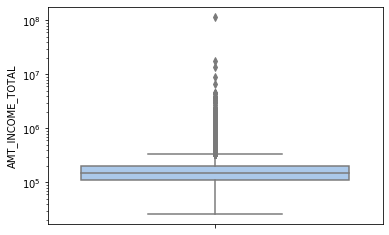

In [75]:
# visualizing the column AMT_INCOME_TOTAL

sns.boxplot(y = 'AMT_INCOME_TOTAL',data = app_data,palette = 'pastel')
plt.yscale('log')

Here we can clearly see the presence of an outlier in the **AMT_INCOME_TOTAL** column which shows the income of a client. The presence of the outlier may be because of the varying income of clients, for instance, a CEO's salary may be way higher than that of a normal IT employee.

In [76]:
# analysing the central tendencies of column AMT_CREDIT

app_data['AMT_CREDIT'].describe(percentiles = [0.75,0.95,0.99])

count    3.045270e+05
mean     5.995619e+05
std      4.021472e+05
min      4.500000e+04
50%      5.172660e+05
75%      8.086500e+05
95%      1.350000e+06
99%      1.845000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

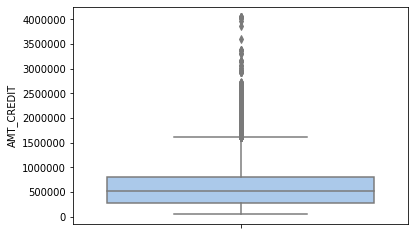

In [77]:
# visualizing the column AMT_CREDIT

sns.boxplot(y = 'AMT_CREDIT',data = app_data,palette = 'pastel')

Here the data spread in the **AMT_CREDIT** column which shows the credit amount of the loan is upto 4000000. Here the extreme values may be treated as outlier values.

In [78]:
# analysing the central tendencies of column AMT_ANNUITY

app_data['AMT_ANNUITY'].describe(percentiles = [0.75,0.95,0.99])

count    304527.000000
mean      27146.463934
std       14480.165991
min        1615.500000
50%       24939.000000
75%       34643.250000
95%       53293.500000
99%       70015.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

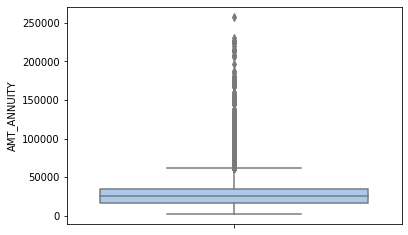

In [79]:
# visualizing the column AMT_ANNUITY

sns.boxplot(y = 'AMT_ANNUITY',data = app_data,palette = 'pastel')

Here the spread of values in the AMT_ANNUITY column which shows loan annuity is upto 250000. Here we can clearly see some extreme values present which may be treated as outlier values.

In [80]:
# analysing the central tendencies of column AMT_GOODS_PRICE

app_data['AMT_GOODS_PRICE'].describe(percentiles = [0.75,0.95,0.99])

count    3.045270e+05
mean     5.384965e+05
std      3.690532e+05
min      4.050000e+04
50%      4.500000e+05
75%      6.795000e+05
95%      1.305000e+06
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

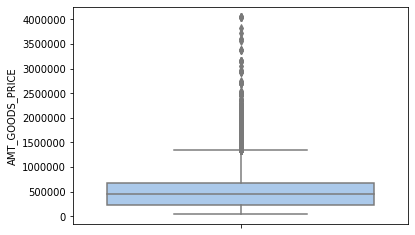

In [81]:
# visualizing the column AMT_GOODS_PRICE

sns.boxplot(y = 'AMT_GOODS_PRICE',data = app_data,palette = 'pastel')

Here again, the spread of values in the AMT_GOODS_PRICE column which shows the price of the goods for which loan is given is upto 4000000. Here we can clearly see some extreme values present which may be treated as outlier values.

In [82]:
# analysing the central tendencies of column AGE

app_data['AGE'].describe(percentiles = [0.75,0.95,0.99])

count    304527.000000
mean         43.445619
std          11.949106
min          20.000000
50%          43.000000
75%          53.000000
95%          63.000000
99%          66.000000
max          69.000000
Name: AGE, dtype: float64

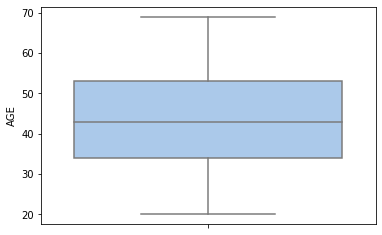

In [83]:
# visualizing the column AGE

sns.boxplot(y = 'AGE',data = app_data,palette = 'pastel')

In [84]:
print(app_data['AGE'].max())
print(app_data['AGE'].min())

69
20


The AGE column is evenly spread out with no outlier values present. The age of the clients varies from 20 to 69.

**6. Binning of continuous variables in the app_data dataframe.**

In [85]:
# binning the AGE column into categories

app_data['AGE_GROUP'] = pd.cut(app_data['AGE'],bins = [10,18,25,44,70],labels = ['Young','Young Adult','Adult','Elderly'])
app_data['AGE_GROUP'].value_counts()

Adult          150893
Elderly        137548
Young Adult     16086
Young               0
Name: AGE_GROUP, dtype: int64

In [86]:
# binning the HOUR_APPR_PROCESS_START column into categories

app_data['HOUR_APPR_PROCESS_START'] = pd.cut(app_data['HOUR_APPR_PROCESS_START'],bins = [0,6,12,16,20,23],labels = ['Past Midnight','Morning','Noon','Evening','Night'])
app_data['HOUR_APPR_PROCESS_START'].value_counts()

Morning          159375
Noon             102784
Evening           28650
Past Midnight     13083
Night               595
Name: HOUR_APPR_PROCESS_START, dtype: int64

## Analysing the app_data

**1. Checking if there is data imbalance in the data.**

In [87]:
# checking the imbalance percentage in the app_dataframe

print('Target 0: {}'.format(round(100*(len(app_data[app_data['TARGET'] == 0])/len(app_data.index)),2)))
print('Target 1: {}'.format(round(100*(len(app_data[app_data['TARGET'] == 1])/len(app_data.index)),2)))

Target 0: 91.9
Target 1: 8.1


**1.1 Checking the correlation of the major numerical variables**

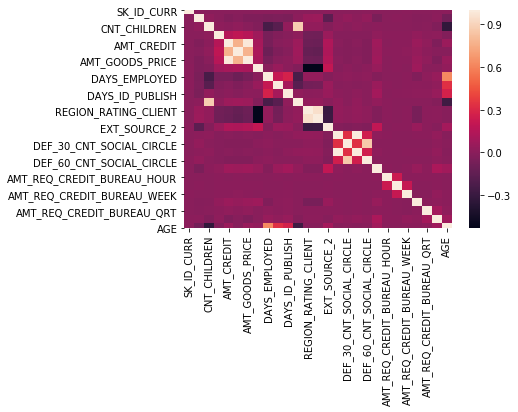

In [88]:
sns.heatmap(app_data.corr())

Obviously there is correlation between the credit and goods price Days employed and credit score from source 2 shows some relation, similarly Age shows relation with days employed

In [89]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648,2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,Morning,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,25,Young Adult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,Morning,Same,Same,Same,Same,Same,Same,School,0.622246,1.0,0.0,1.0,0.0,828,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,45,Elderly
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260,2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,Morning,Same,Same,Same,Same,Same,Same,Government,0.555912,0.0,0.0,0.0,0.0,815,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,52,Elderly
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,9833,2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,Evening,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,52,Elderly
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,4311,3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,Morning,Same,Same,Same,Same,Different,Different,Religion,0.322738,0.0,0.0,0.0,0.0,1106,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,54,Elderly


**2. Dividing the dataframe into two datasets.**

In [90]:
# dataset with target variable as 0 (clients who repaid their loan)

target_0 = app_data[app_data['TARGET'] == 0]
target_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,Morning,Same,Same,Same,Same,Same,Same,School,0.622246,1.0,0.0,1.0,0.0,828,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,45,Elderly
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260,2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,Morning,Same,Same,Same,Same,Same,Same,Government,0.555912,0.0,0.0,0.0,0.0,815,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,52,Elderly
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,9833,2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,Evening,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,52,Elderly
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,4311,3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,Morning,Same,Same,Same,Same,Different,Different,Religion,0.322738,0.0,0.0,0.0,0.0,1106,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,54,Elderly
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1588,4970,477,Y,Y,Y,Y,Y,N,Laborers,2.0,2,2,WEDNESDAY,Noon,Same,Same,Same,Same,Same,Same,Other,0.354225,0.0,0.0,0.0,0.0,2536,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,1,1,46,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,365243,7369,2357,Y,N,N,Y,Y,N,Self employed,1.0,2,2,MONDAY,Noon,Same,Same,Same,Same,Same,Same,XNA,0.346391,0.0,0.0,0.0,0.0,0,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,2,0,0,66,Elderly
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,236,8456,1982,Y,Y,N,Y,N,N,Sales staff,1.0,1,1,THURSDAY,Noon,Same,Same,Same,Same,Sa

In [91]:
# dataset with target variable as 1 (clients who defaulted on their loan)

target_1 = app_data[app_data['TARGET'] == 1]
target_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648,2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,Morning,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,25,Young Adult
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,2628,6573,1827,Y,Y,N,Y,N,N,Cooking staff,1.0,3,2,MONDAY,Morning,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,161,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,0,0,0,0,2,2,51,Elderly
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1262,1182,1029,Y,Y,N,Y,N,N,Laborers,2.0,2,2,TUESDAY,Morning,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,1075,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,2,0,4,47,Elderly
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,3597,45,4409,Y,Y,Y,Y,Y,N,Sales staff,2.0,3,3,THURSDAY,Morning,Same,Same,Same,Same,Same,Same,Self-employed,0.674203,1.0,0.0,1.0,0.0,1480,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,2,36,Adult
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,365243,5391,4199,Y,N,N,Y,N,N,Self employed,2.0,2,2,THURSDAY,Morning,Same,Same,Same,Same,Same,Same,XNA,0.023952,1.0,1.0,1.0,1.0,0,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,67,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,3048,8507,2580,Y,Y,Y,Y,N,N,Laborers,3.0,3,3,MONDAY,Noon,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.329708,0.0,0.0,0.0,0.0,324,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,2,27,Adult
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,2405,500,4704,Y,Y,Y,Y,N,N,Laborers,3.0,2,2,T

**3. Performing univariate analysis for both the target_0 and target_1 columns.**

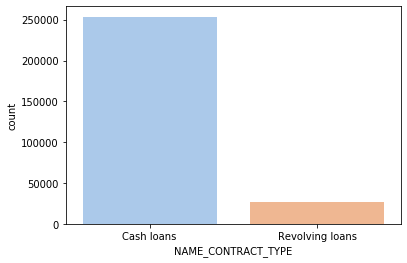

In [92]:
# analysing the column NAME_CONTRACT_TYPE for target_0 dataset

sns.countplot(x = 'NAME_CONTRACT_TYPE',data = target_0,palette = 'pastel')

Analysing the above plot one can infer that most of the clients who repaid their loan applied for Cash loans.

In [93]:
app_data['CODE_GENDER'].value_counts()

F    200482
M    104045
Name: CODE_GENDER, dtype: int64

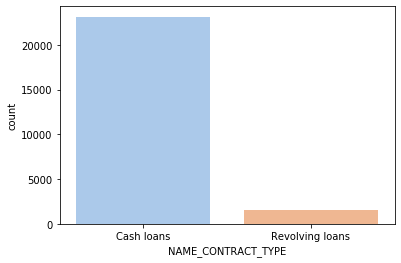

In [94]:
# analysing the column NAME_CONTRACT_TYPE for target_1 dataset

sns.countplot(x = 'NAME_CONTRACT_TYPE',data = target_1,palette = 'pastel')

Though the number clients applying for Cash loans is huge, analysing the above plot one can infer that clients applying for Cash loans are more likely to default as compared to the clients applying for Revolving loans.

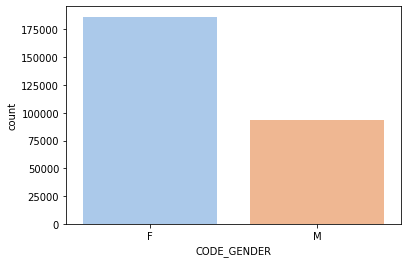

In [95]:
# analysing the column CODE_GENDER for target_0 dataset

sns.countplot(x = 'CODE_GENDER',data = target_0,palette = 'pastel')

Analysing the above plot one can infer that most of the clients who repaid their loan were females.

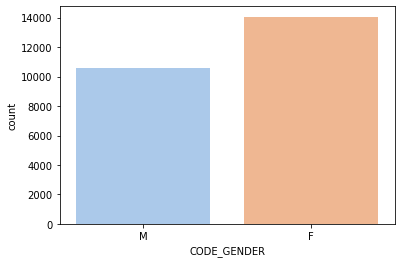

In [96]:
# analysing the column CODE_GENDER for target_1 dataset

sns.countplot(x = 'CODE_GENDER',data = target_1,palette = 'pastel')

Though the number of females applying for the loan is huge, analysing the above plot one can infer that females are more likely to default on the loan as compared to males.

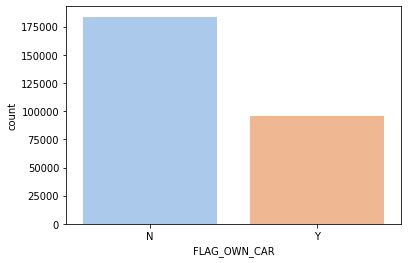

In [97]:
# analysing the column FLAG_OWN_CAR for target_0 dataset

sns.countplot(x = 'FLAG_OWN_CAR',data = target_0,palette = 'pastel')

Analysing the above plot one can infer that most of the clients who repaid their loan do not own a car.

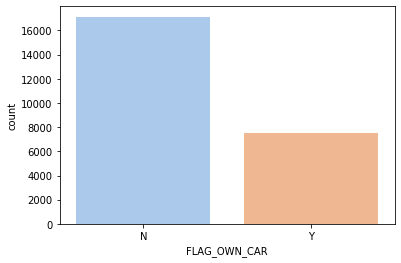

In [98]:
# analysing the column FLAG_OWN_CAR for target_1 dataset

sns.countplot(x = 'FLAG_OWN_CAR',data = target_1,palette = 'pastel')

As most of the clients who defaulted on their loan do not own a car, one can infer that the client owning a car does not have any effect on the default rate.

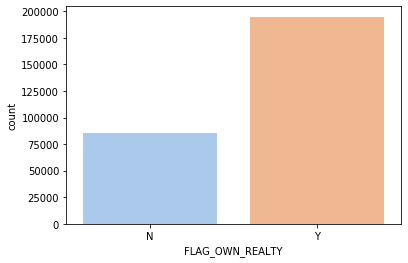

In [99]:
# analysing the column FLAG_OWN_REALTY for target_0 dataset

sns.countplot(x = 'FLAG_OWN_REALTY',data = target_0,palette = 'pastel')

Analysing the above plot one can infer that most of the clients who repaid their loan own a realty.

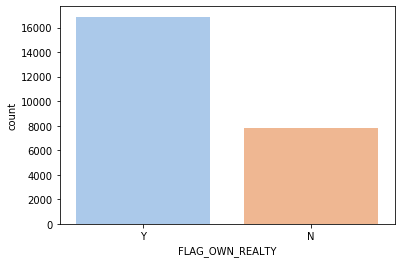

In [100]:
# analysing the column FLAG_OWN_REALTY for target_1 dataset

sns.countplot(x = 'FLAG_OWN_REALTY',data = target_1,palette = 'pastel')

Here one can infer that clients who do own a realty are more likely to default on their loan as compared to the clients who do not own a realty.

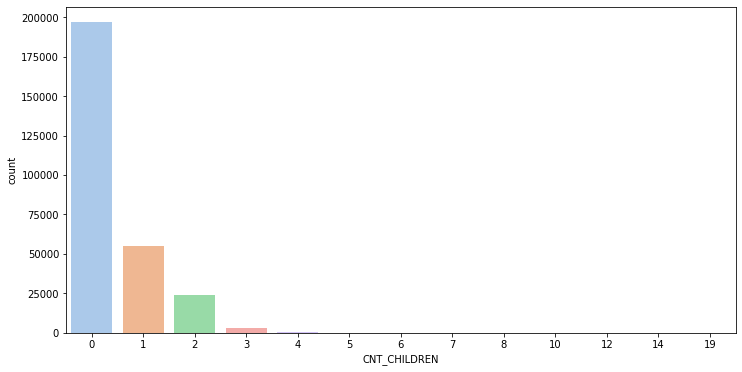

In [101]:
# analysing the column CNT_CHILDREN for target_0 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'CNT_CHILDREN',data = target_0,palette = 'pastel')

Analysing the above plot one can infer that most of the clients who repaid their loan have no children.

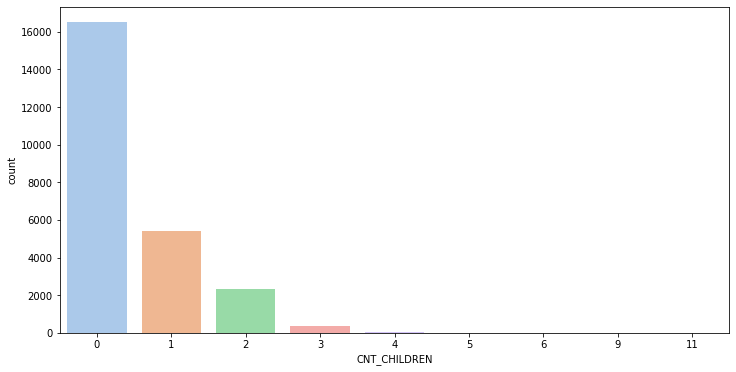

In [102]:
# analysing the column CNT_CHILDREN for target_1 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'CNT_CHILDREN',data = target_1,palette = 'pastel')

Here one can infer that the number of children a client has does not have any effect on clients defaulting on their loan.

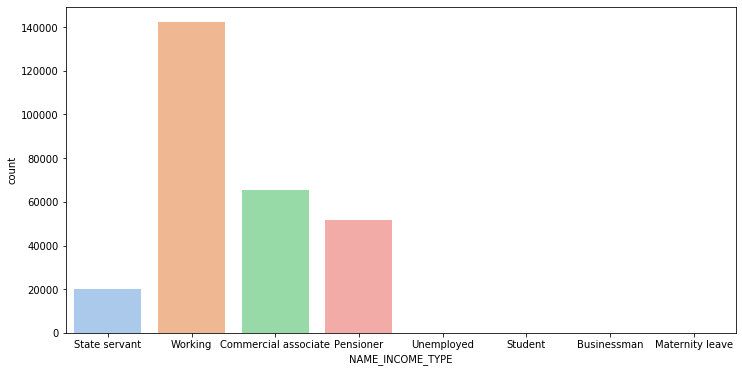

In [103]:
# analysing the column NAME_INCOME_TYPE for target_0 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_INCOME_TYPE',data = target_0,palette = 'pastel')

As we can clearly see the **Working professionals** and the **Commercial associates** are the ones who repaid their loan the most.

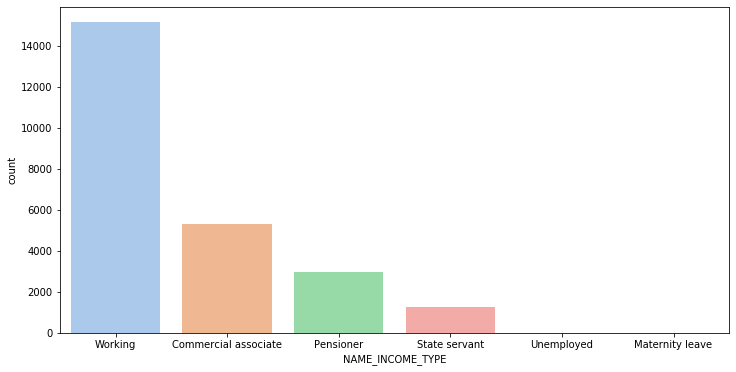

In [104]:
# analysing the column NAME_INCOME_TYPE for target_1 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_INCOME_TYPE',data = target_1,palette = 'pastel')

Here the number of clients who defaulted on their loan are in proportion to the number of clients who repaid their loan.

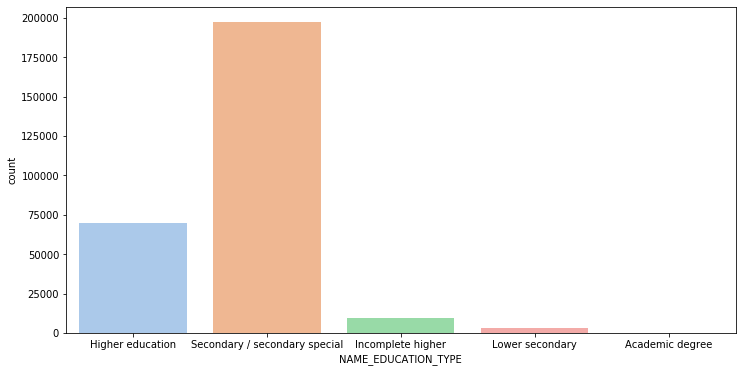

In [105]:
# analysing the column NAME_EDUCATION_TYPE for target_0 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_EDUCATION_TYPE',data = target_0,palette = 'pastel')

Here we can infer that clients having a secondary level or a higher level of education are the ones who repaid their loan the most.

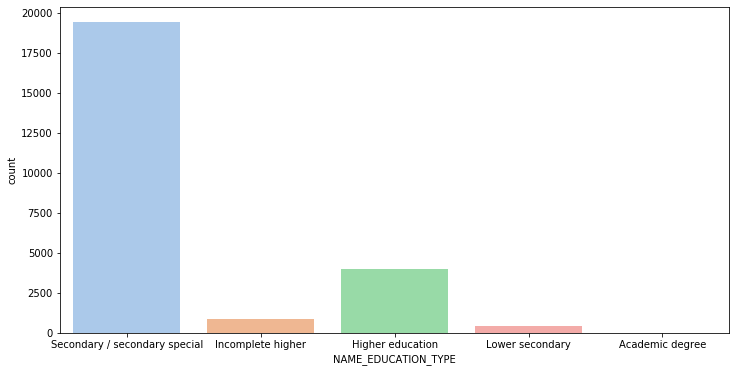

In [106]:
# analysing the column NAME_EDUCATION_TYPE for target_1 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_EDUCATION_TYPE',data = target_1,palette = 'pastel')

As the clients having a secondary level or higher level of education are the ones who repaid their loan the most, it is obvious that they have high cases of default as compared to the other categories. Besides that, people with higher education are needed to be given attention.

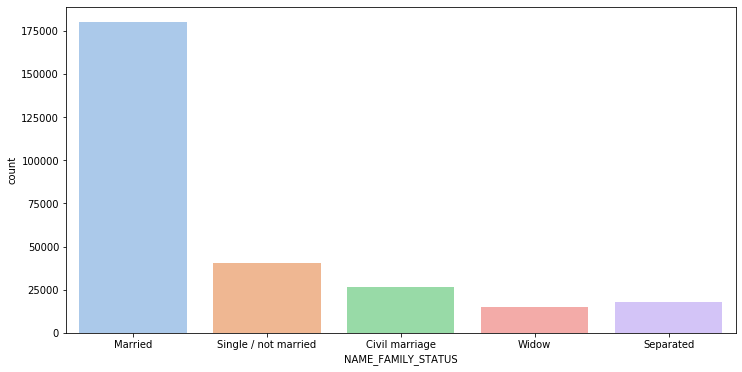

In [107]:
# analysing the column NAME_FAMILY_STATUS for target_0 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_FAMILY_STATUS',data = target_0,palette = 'pastel')

Clients who repaid their loan are mostly married.

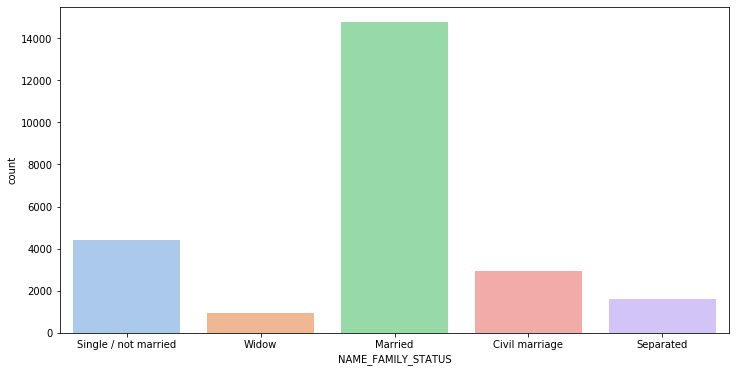

In [108]:
# analysing the column NAME_FAMILY_STATUS for target_1 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_FAMILY_STATUS',data = target_1,palette = 'pastel')

Here again there isn't any obvious trend as the number of default cases are in proportion to the number of clients who repaid their loan.

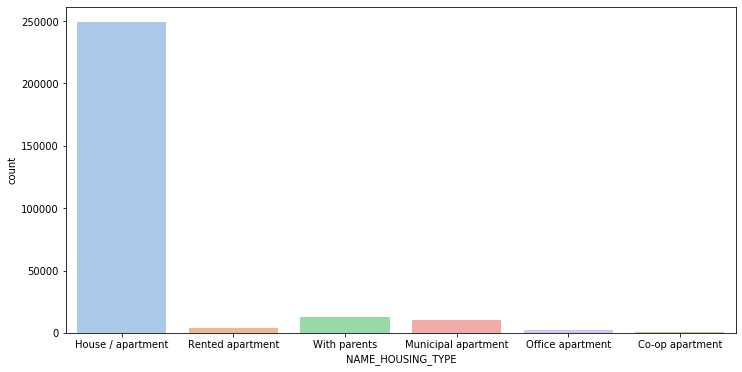

In [109]:
# analysing the column NAME_HOUSING_TYPE for target_0 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_HOUSING_TYPE',data = target_0,palette = 'pastel')

Clients who repaid their loan mostly have their own house or apartment.

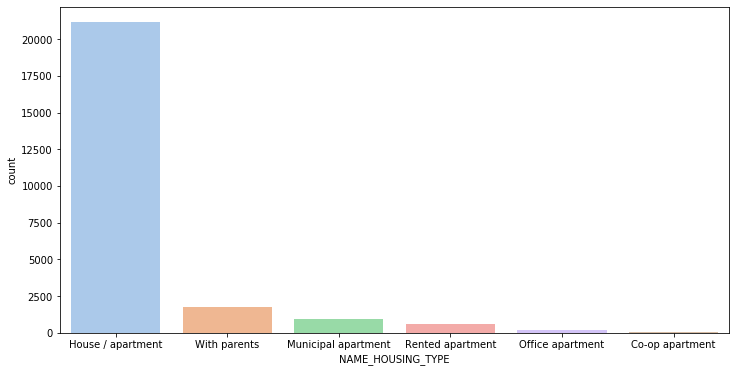

In [110]:
# analysing the column NAME_HOUSING_TYPE for target_1 dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'NAME_HOUSING_TYPE',data = target_1,palette = 'pastel')

Here again there isn't any obvious trend as the number of default cases are in proportion to the number of clients who repaid their loan.

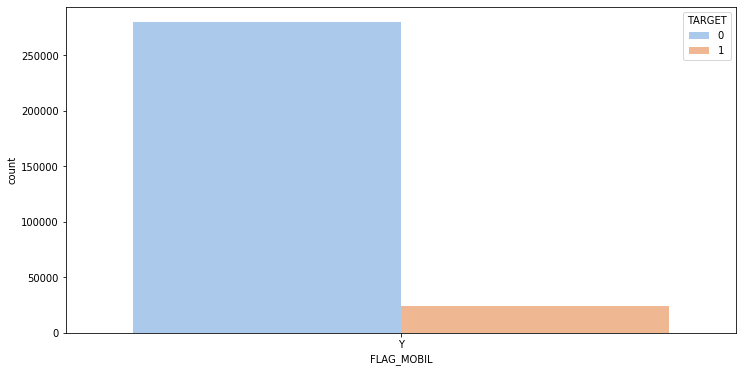

In [111]:
# analysing the column FLAG_MOBIL for app_data dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'FLAG_MOBIL',hue = 'TARGET',data = app_data,palette = 'pastel')

Since each client has provided the mobile phone we cannot infer much from above plot.

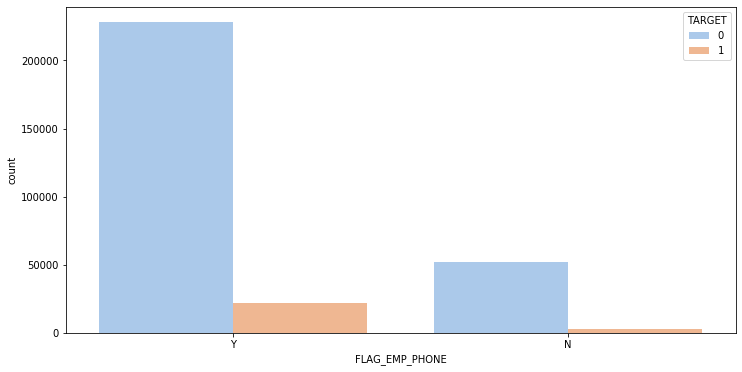

In [112]:
# analysing the column FLAG_EMP_PHONE for app_data dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'FLAG_EMP_PHONE',hue = 'TARGET',data = app_data,palette = 'pastel')

Here, clients who have not provided the work phone have very low default rate.

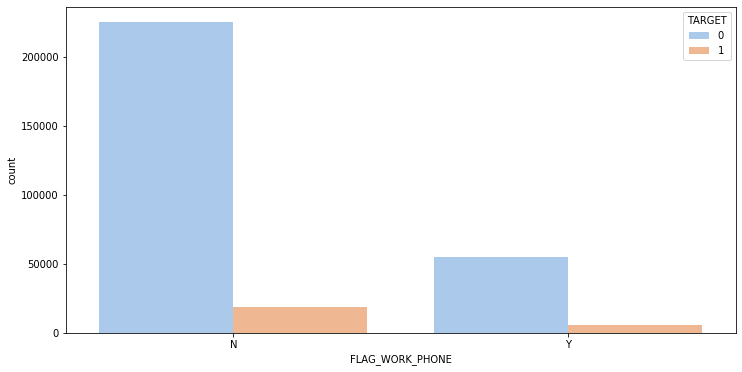

In [113]:
# analysing the column FLAG_WORK_PHONE for app_data dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'FLAG_WORK_PHONE',hue = 'TARGET',data = app_data,palette = 'pastel')

Here again there isn't any obvious trend.

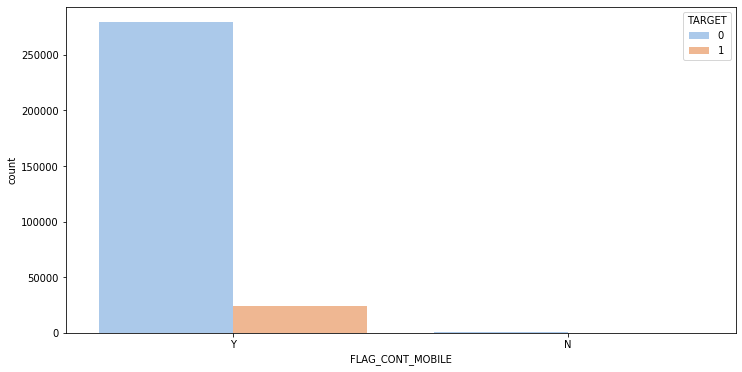

In [114]:
# analysing the column FLAG_CONT_MOBILE for app_data dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'FLAG_CONT_MOBILE',hue = 'TARGET',data = app_data,palette = 'pastel')

Almost every client's mobile phone was reachable.

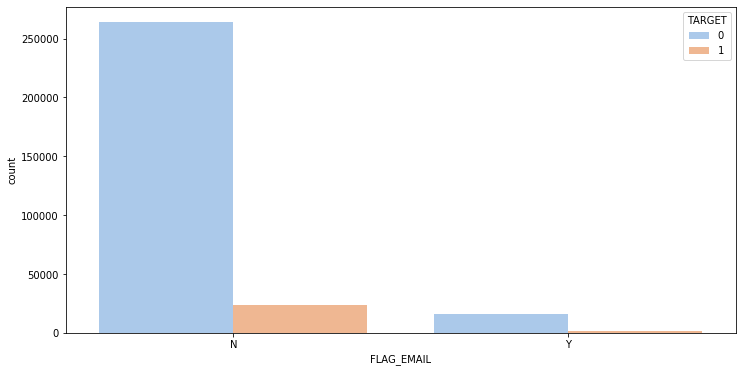

In [115]:
# analysing the column FLAG_EMAIL for app_data dataset

fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'FLAG_EMAIL',hue = 'TARGET',data = app_data,palette = 'pastel')

Analysing the above plot one can infer that the clients who provided email have a very low default rate.

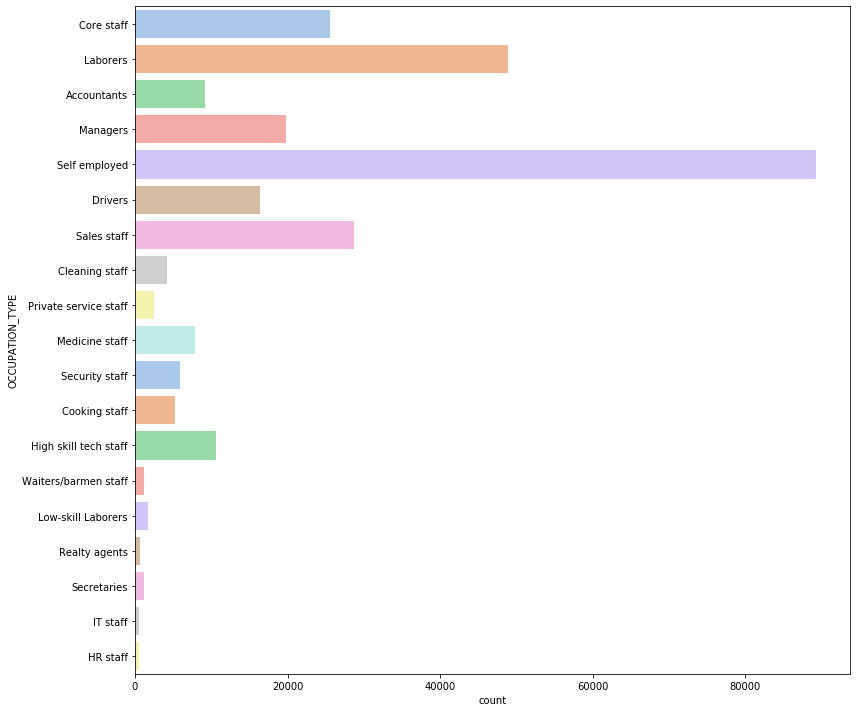

In [116]:
# analysing the column OCCUPATION_TYPE for target_0 dataset

fig = plt.figure(figsize = (12,10))
sns.countplot(y = 'OCCUPATION_TYPE',data = target_0,palette = 'pastel')
plt.tight_layout()

Here one can infer that clients who repaid their loan are mostly either **Self employed** or **Laborers** or from **Sales staff**.

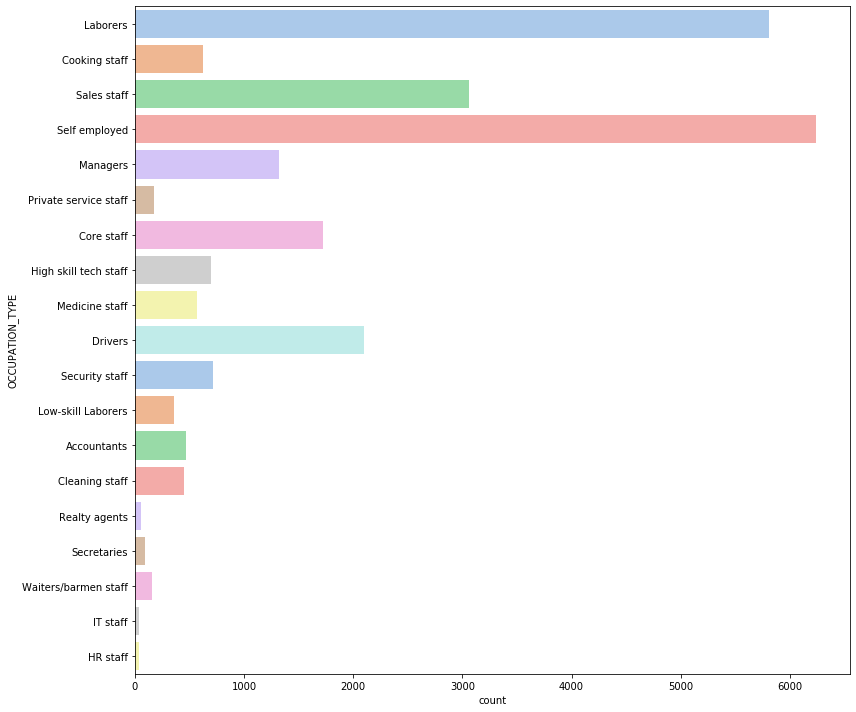

In [117]:
# analysing the column OCCUPATION_TYPE for target_1 dataset

fig = plt.figure(figsize = (12,10))
sns.countplot(y = 'OCCUPATION_TYPE',data = target_1,palette = 'pastel')
plt.tight_layout()

Here again, the clients who have defaulted on their loan are in proportion to the number of clients who repaid their loan.

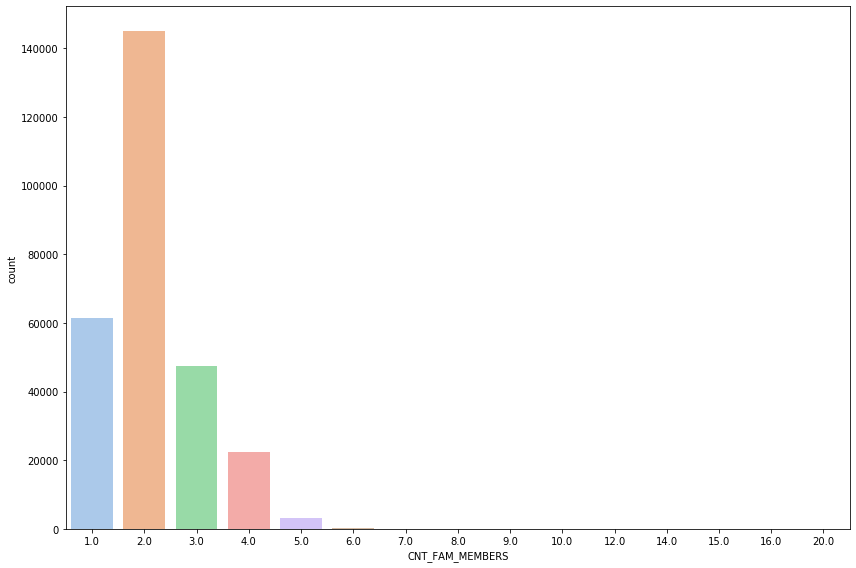

In [118]:
# analysing the column CNT_FAM_MEMBERS for target_0 dataset

fig = plt.figure(figsize = (12,8))
sns.countplot(x = 'CNT_FAM_MEMBERS',data = target_0,palette = 'pastel')
plt.tight_layout()

The clients who repaid their loan mostly have 2 family members or 1 family member.

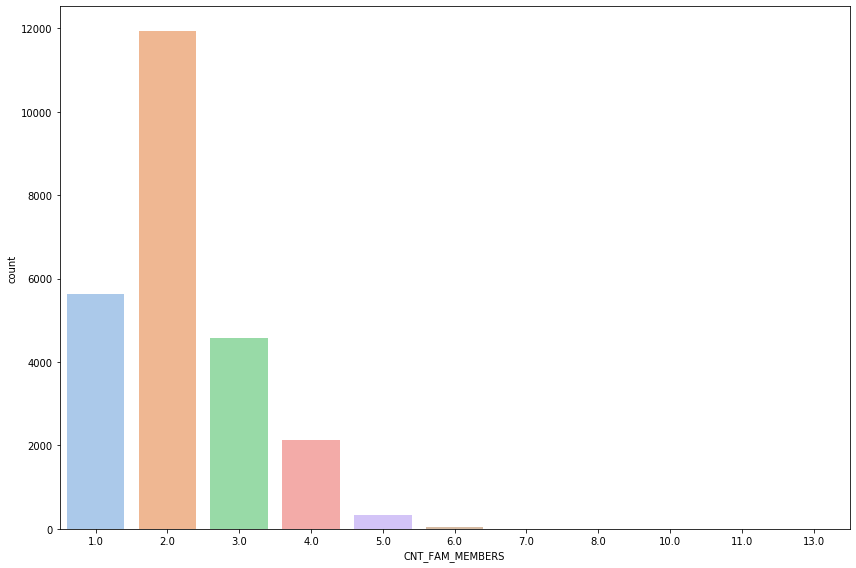

In [119]:
# analysing the column CNT_FAM_MEMBERS for target_1 dataset

fig = plt.figure(figsize = (12,8))
sns.countplot(x = 'CNT_FAM_MEMBERS',data = target_1,palette = 'pastel')
plt.tight_layout()

Again the clients who defaulted on their loan are in proportion to the clients who repaid their loan.

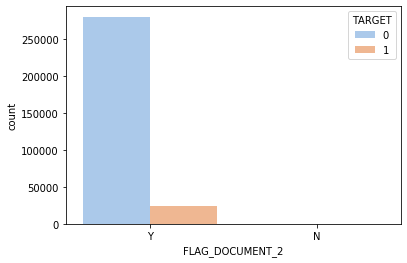

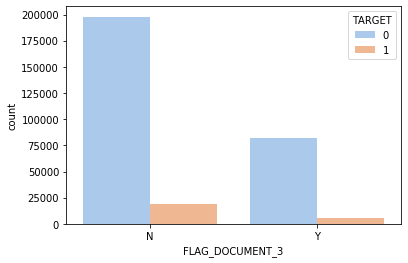

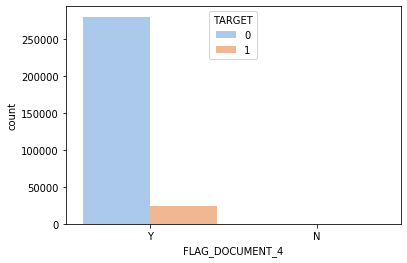

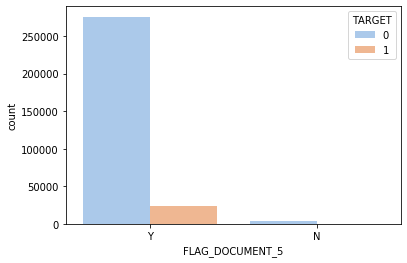

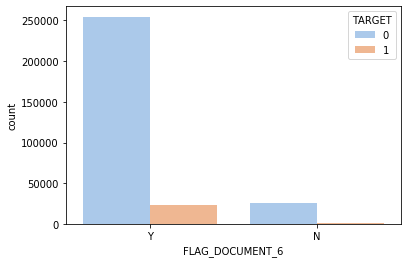

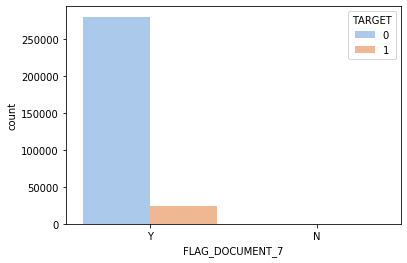

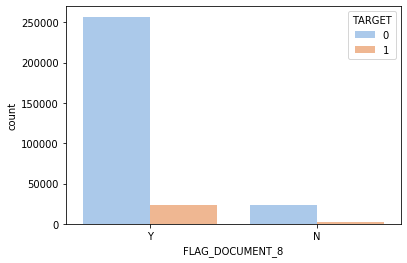

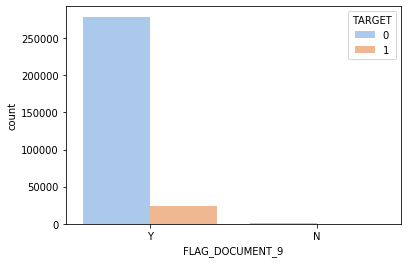

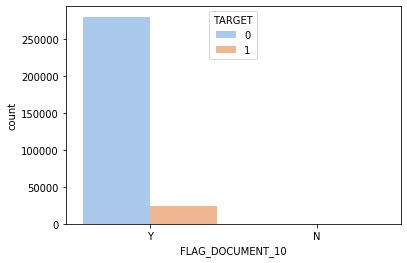

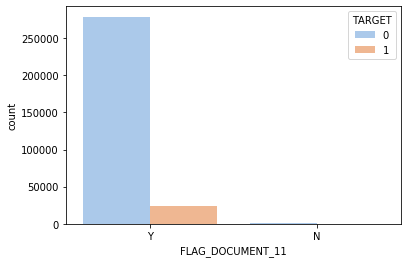

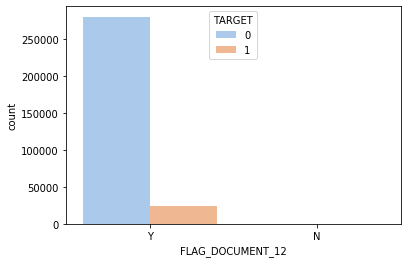

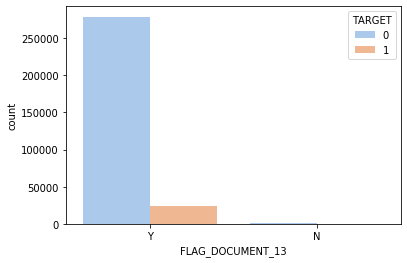

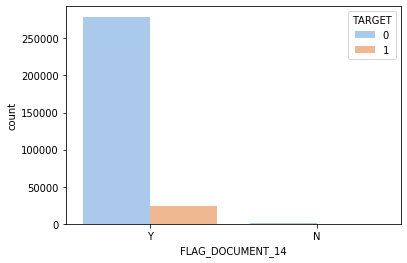

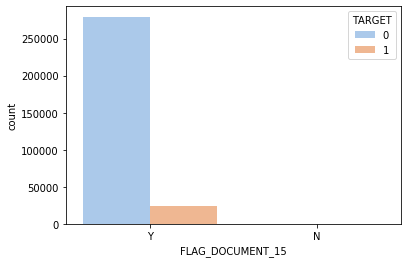

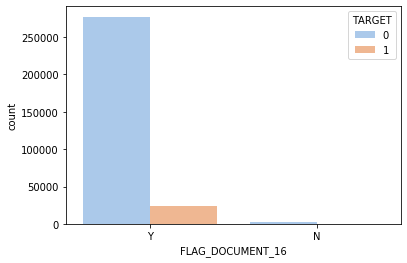

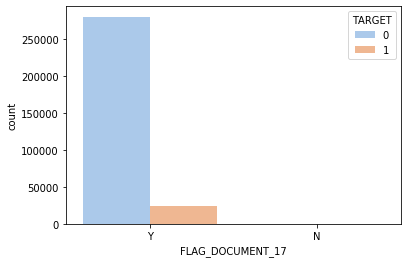

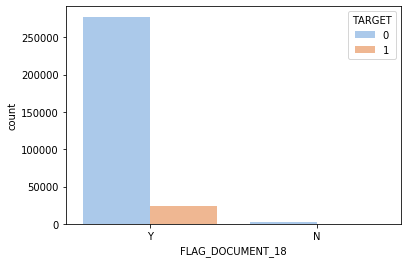

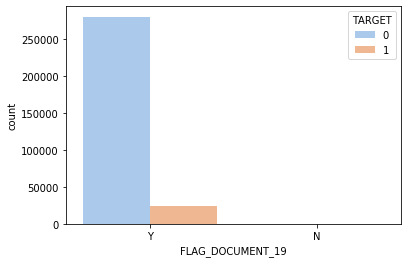

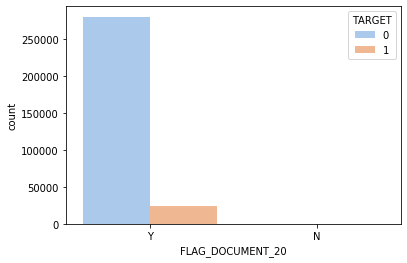

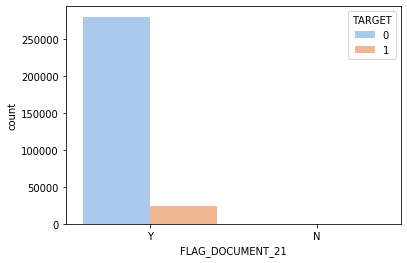

In [120]:
# analysing the FLAG_DOCUMENTs columns for the app_data

for i in range(2,22):
    sns.countplot(x = 'FLAG_DOCUMENT_{}'.format(i),hue = 'TARGET',data = app_data,palette = 'pastel')
    plt.show()

Here we can clearly see that the clients who provided the FLAG_DOCUMENT_3 have a very low default rate.

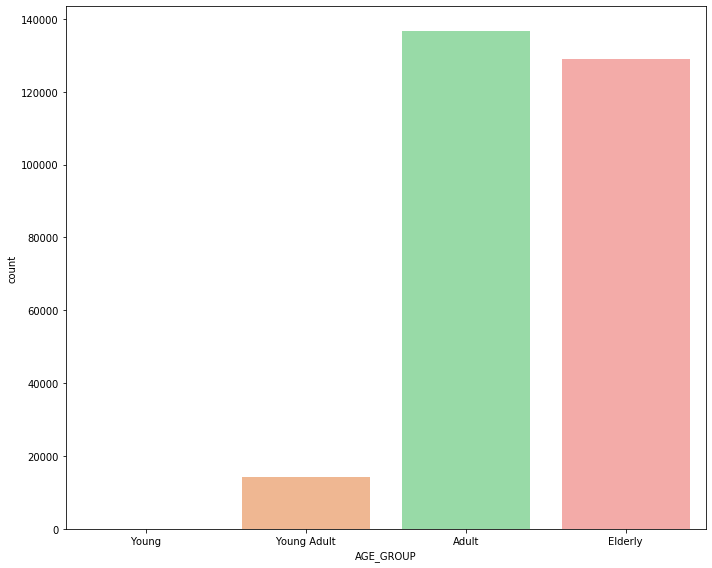

In [121]:
# analysing the column AGE for target_0

fig = plt.figure(figsize = (10,8))
sns.countplot(x = 'AGE_GROUP',data = target_0,palette = 'pastel')
plt.tight_layout()

Clients who repaid their loan are mostly either **Adults** or **Elderly**.

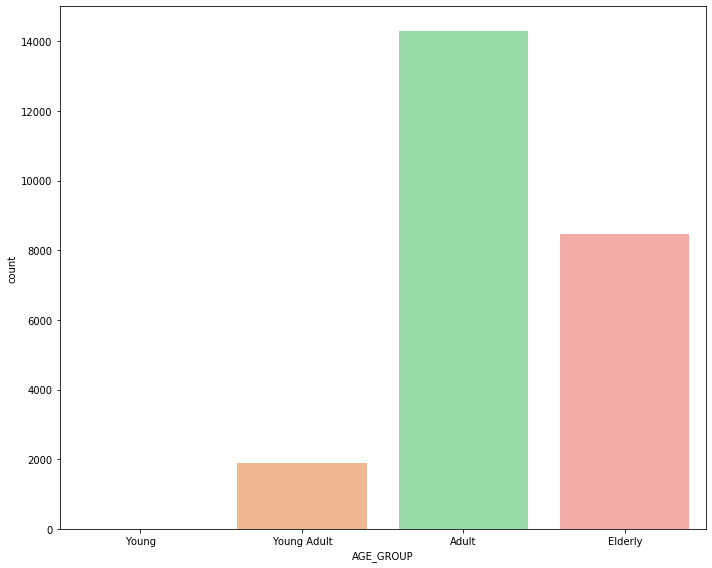

In [122]:
# analysing the column AGE for target_1

fig = plt.figure(figsize = (10,8))
sns.countplot(x = 'AGE_GROUP',data = target_1,palette = 'pastel')
plt.tight_layout()

Here again the loan defaults are in proportion to the clients who repaid their loan.

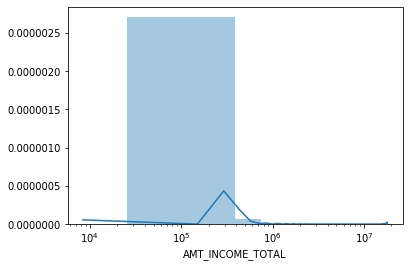

In [123]:
# analysing the column AMT_INCOME_TOTAL for target_0 dataset

sns.distplot(target_0['AMT_INCOME_TOTAL'])
plt.xscale('log')

Here one can infer that most of the clients who repaid their loan have income of the order of 10^5 to 10^6.

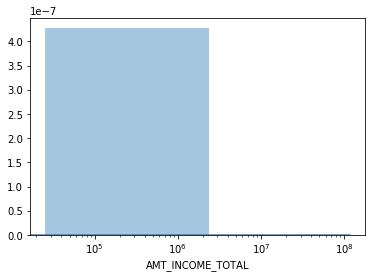

In [124]:
# analysing the column AMT_INCOME_TOTAL for target_1 dataset

sns.distplot(target_1['AMT_INCOME_TOTAL'])
plt.xscale('log')

The income of the clients who defaulted on their loan is evenly spread out between the order of 10^5 to 10^8.

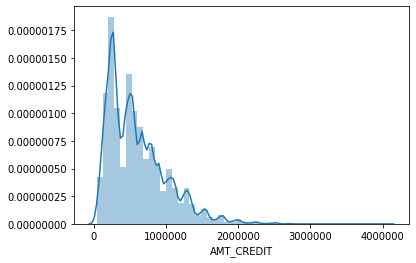

In [125]:
# analysing the column AMT_CREDIT for target_0

sns.distplot(target_0['AMT_CREDIT'])

The credit amount of the clients who repaid their loan is mostly spread out between 0 and 1500000.

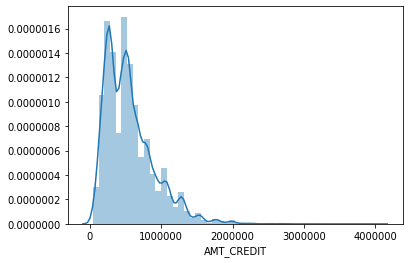

In [126]:
# analysing the column AMT_CREDIT for target_1

sns.distplot(target_1['AMT_CREDIT'])

Again, the spread of the credit amount for clients who defaulted on their loan is mostly spread out between 0 and 1500000.

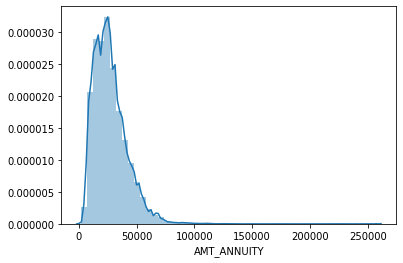

In [127]:
# analysing the column AMT_ANNUITY for target_0

sns.distplot(target_0['AMT_ANNUITY'])

The annuity amount of the loans for the clients who repaid their loan is spread out between 0 and 75000.

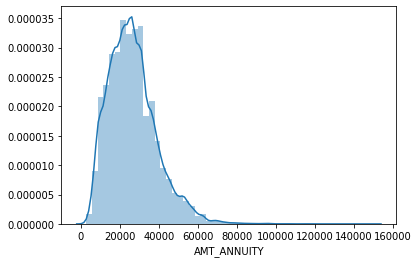

In [128]:
# analysing the column AMT_ANNUITY for target_1

sns.distplot(target_1['AMT_ANNUITY'])

The annuity amount of the loans for the clients who defaulted on their loan is spread out between 0 and 60000 which is less as compared to the clients who repaid their loan. Here one can infer that the clients who have a less loan annuity amount are more likely to default on their loan.

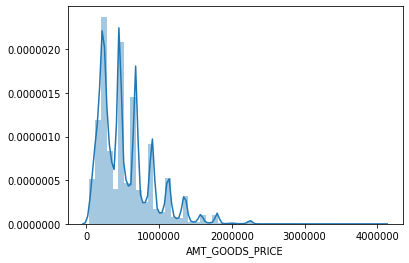

In [129]:
# analysing the column AMT_GOODS_PRICE for target_0

sns.distplot(target_0['AMT_GOODS_PRICE'])

The price of the goods for the clients who repaid their loan is mostly spread out between 0 and 1500000.

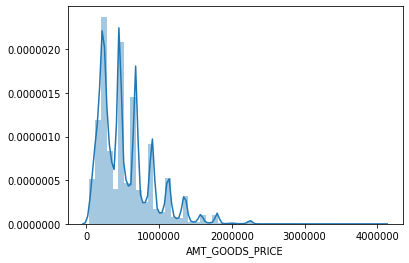

In [130]:
# analysing the column AMT_GOODS_PRICE for target_1

sns.distplot(target_0['AMT_GOODS_PRICE'])

The price of the goods for the clients who defaulted on their loan is spread out between 0 and 1500000 with some outlier values present. Here we cannot make a strong inference as to which client is more likely to default.

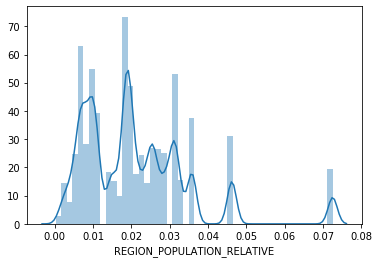

In [131]:
# analysing the column REGION_POPULATION_RELATIVE for target_0

sns.distplot(target_0['REGION_POPULATION_RELATIVE'])

The normalised population for the clients who repaid their loan is spread out between 0 and 0.05 with some outlier values present around 0.07.

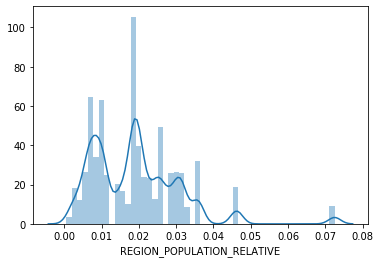

In [132]:
# analysing the column REGION_POPULATION_RELATIVE for target_1

sns.distplot(target_1['REGION_POPULATION_RELATIVE'])

The normalised population for the clients who defaulted on their loan is spread out between 0 and 0.05 with some outlier values present around 0.07 which is pretty much the same as the clients who repaid their loan.

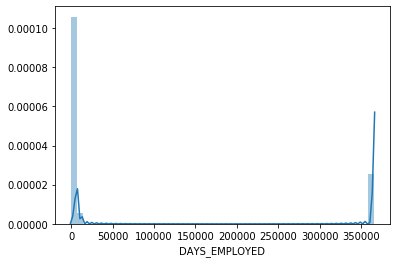

In [133]:
# analysing the column DAYS_EMPLOYED for target_0

sns.distplot(target_0['DAYS_EMPLOYED'])

The clients who repaid their loan have got the number of days employed spread out between 0 and 25000 with some outlier values present at around 350000.

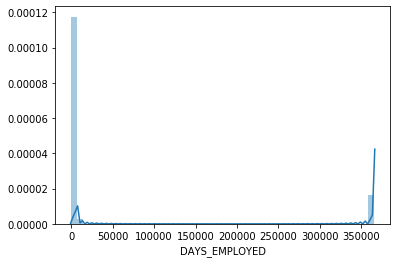

In [134]:
# analysing the column DAYS_EMPLOYED for target_1

sns.distplot(target_1['DAYS_EMPLOYED'])

The data spread of the column DAYS_EMPLOYED for the clients who defaulted on their loan is pretty much the same as that of the clients who repaid their loan with some outlier values present at 350000.

**4. Performing bivariate analysis for both the target_0 and target_1 columns.**

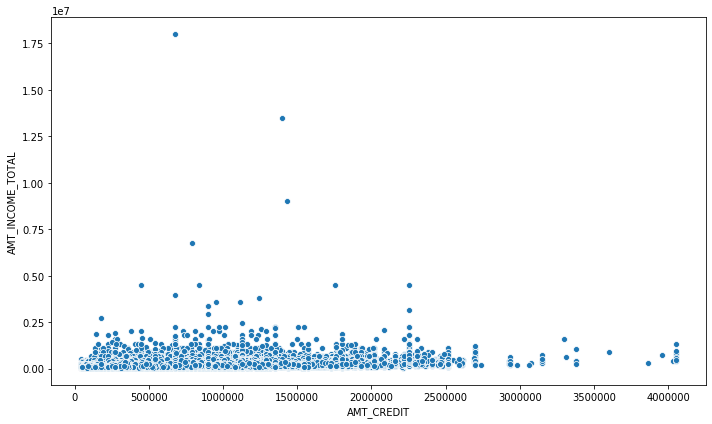

In [135]:
# analysing the columns AMT_INCOME_TOTAL and AMT_CREDIT for target_0

fig = plt.figure(figsize = (10,6))
sns.scatterplot(y = 'AMT_INCOME_TOTAL',x = 'AMT_CREDIT',data = target_0)
plt.tight_layout()

Here the data points for the clients who repaid their loan are mostly clustered between 0 and 2500000 with some outlier values present.

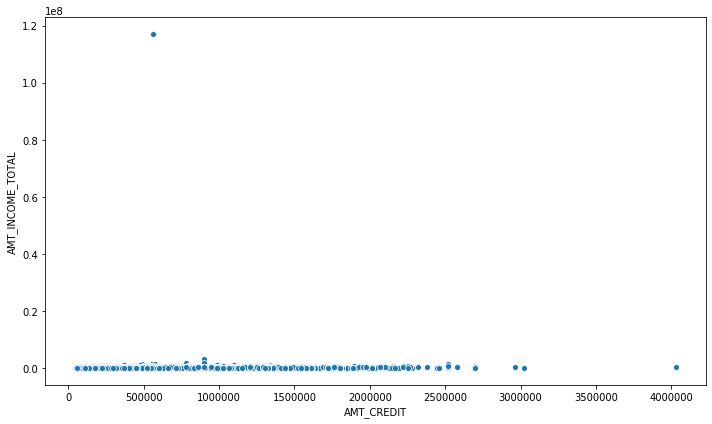

In [136]:
# analysing the columns AMT_INCOME_TOTAL and AMT_CREDIT for target_1

fig = plt.figure(figsize = (10,6))
sns.scatterplot(y = 'AMT_INCOME_TOTAL',x = 'AMT_CREDIT',data = target_1)
plt.tight_layout()

Here again the data points for the clients who defaulted on their loan are mostly clustered between 0 and 2500000, but with very few outlier values present. Here we can clearly see a straight line indicating that the clients who defaulted on their loan have similar income but varying credit amount.

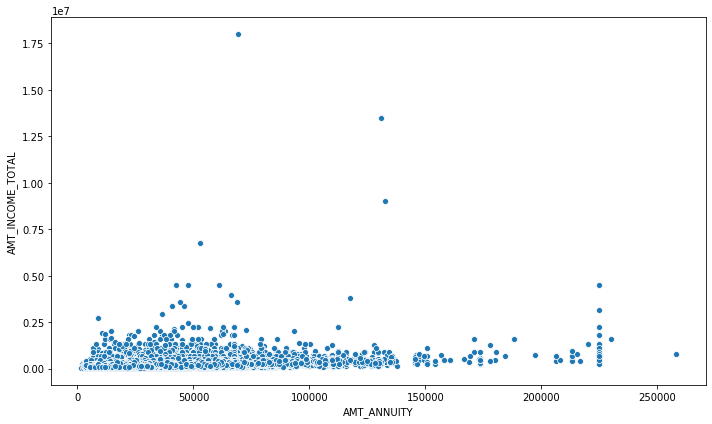

In [137]:
# analysing the columns AMT_INCOME_TOTAL and AMT_ANNUITY for target_0

fig = plt.figure(figsize = (10,6))
sns.scatterplot(y = 'AMT_INCOME_TOTAL',x = 'AMT_ANNUITY',data = target_0)
plt.tight_layout()

Here the data points for the clients who repaid their loan are mostly clustered between 0 and 150000 with some outlier values present.

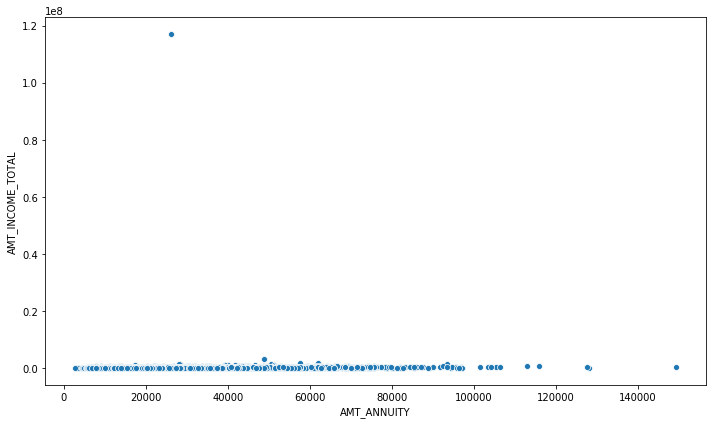

In [138]:
# analysing the columns AMT_INCOME_TOTAL and AMT_ANNUITY for target_1

fig = plt.figure(figsize = (10,6))
sns.scatterplot(y = 'AMT_INCOME_TOTAL',x = 'AMT_ANNUITY',data = target_1)
plt.tight_layout()

Here again the data points for the clients who defaulted on their loan are mostly clustered between 0 and 100000, but with very few outlier values present. Here we can clearly see a straight line indicating that the clients who defaulted on their loan have similar income but varying annuity amount.

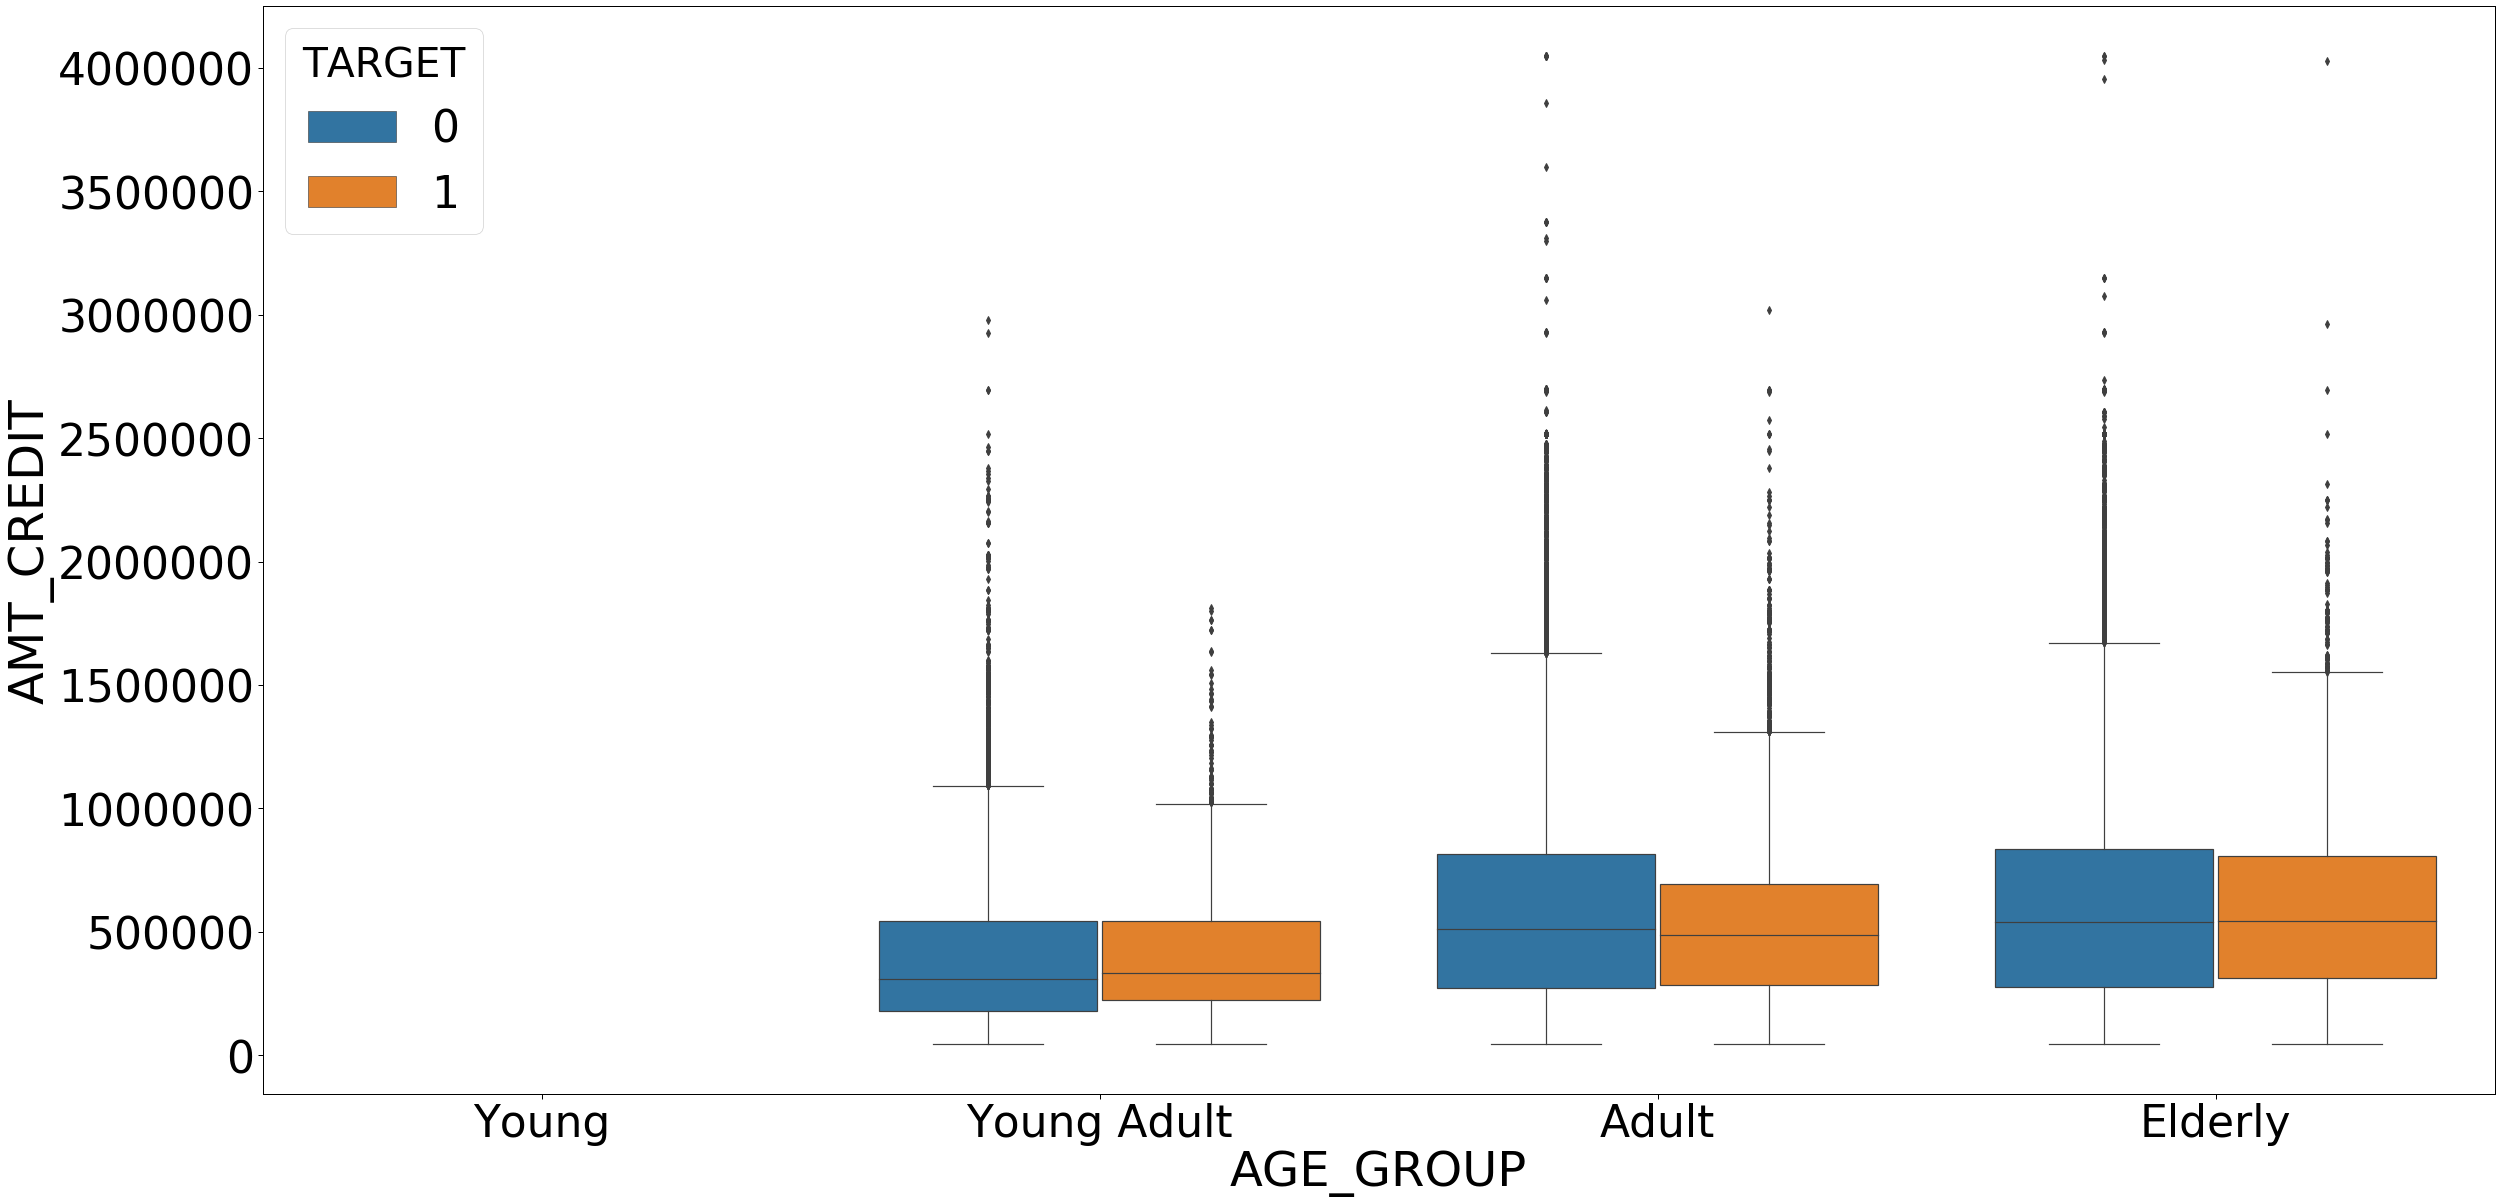

In [139]:
plt.figure(figsize=(40,20))
sns.set_context("paper", font_scale=5)
sns.boxplot(x='AGE_GROUP',y='AMT_CREDIT',hue='TARGET',data=app_data,whis=1.5)

Just a credit spread across the age groups. We see the credit amount increase with the age group

<Figure size 1440x1080 with 0 Axes>

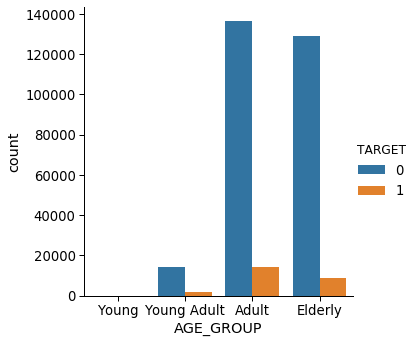

In [140]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1.5)
sns.catplot(x="AGE_GROUP", hue="TARGET", kind="count", data=app_data)
plt.show()

We see most of the adults opt for loan and taking the proportion, they default the most too.

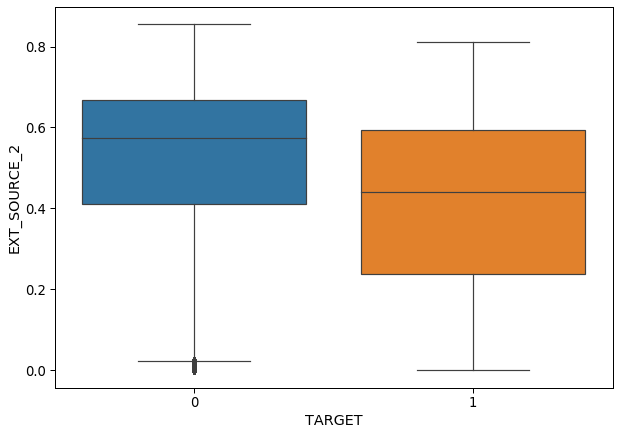

In [141]:
plt.figure(figsize=(10,7))
sns.boxplot(x='TARGET',y='EXT_SOURCE_2',data = app_data,whis=1.5)
plt.show()

We can see people with score from 0.42 to 0.68 with median around 0.58 had no problems in repaying while score in range 0.23 to 0.59 have a problem in paying. The median score for defaulters is around 0.45 and the spread is larger below the median. Hence most of the defaulters fall below 0.45.

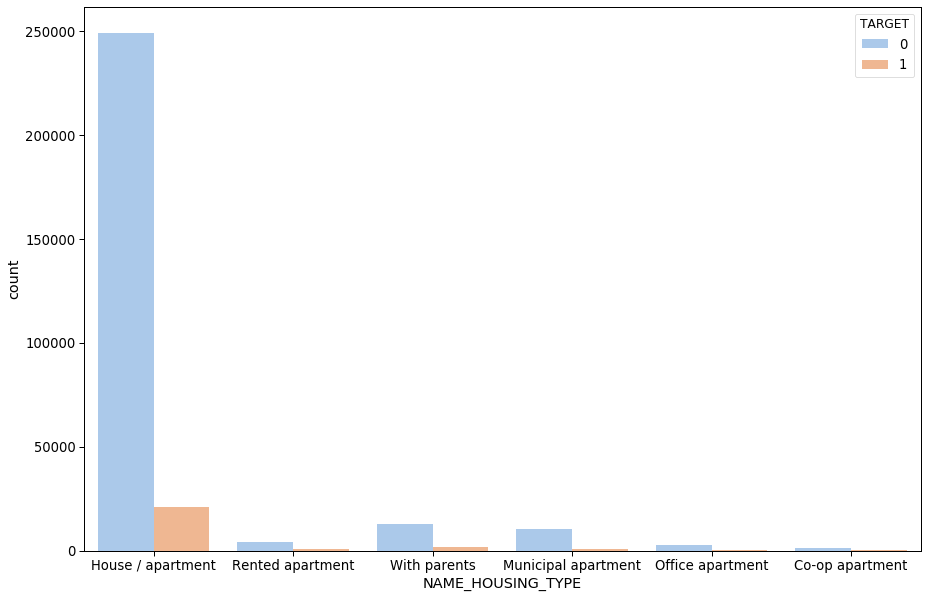

In [142]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'NAME_HOUSING_TYPE',hue = 'TARGET',data = app_data,palette = 'pastel')
plt.show()

Just data proportion. There seems no linkage between taking loans and housing type.

# Working on Previous_application

First we clean the data

In [143]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [145]:
prev_data.shape

(1670214, 37)

In [146]:
(prev_data.isnull().sum()*100/len(prev_data)).sort_values(ascending=False).head(60)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [147]:
#dropping the columns with high percentage values

prev_data.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT','NAME_TYPE_SUITE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE'],axis=1,inplace=True)

In [148]:
#Make the unknown entry as null value and then removing the rows with missing values

prev_data['NAME_CLIENT_TYPE'].replace('XNA',np.NaN,inplace=True)
prev_data['NAME_CLIENT_TYPE'].isnull().sum()

1941

In [149]:
prev_data = prev_data[~prev_data['NAME_CLIENT_TYPE'].isnull()]
prev_data['NAME_CLIENT_TYPE'].isnull().sum()

0

In [150]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


<Figure size 1440x1080 with 0 Axes>

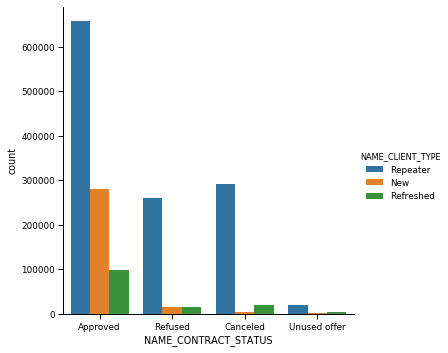

In [151]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
sns.catplot(x="NAME_CONTRACT_STATUS", hue="NAME_CLIENT_TYPE", kind="count", data=prev_data)
plt.show()

The credit line estimation needs to be given importance, as most of the repeat customers are cancelling the process. The most of business always comes from repetative purchases, thus here repeating customers are being rejected from the system.

MERGING THE DATASETS

Let's group by customer ID and count their number of applications in the past

In [152]:
new_group = prev_data[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
new_group.head()

,SK_ID_CURR,PREV_APP_COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [153]:
#Now merging the data set on app_data's current ID
merged_df = app_data.merge(new_group, on =['SK_ID_CURR'], how = 'left')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,PREV_APP_COUNT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648,2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,Morning,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,25,Young Adult,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,Morning,Same,Same,Same,Same,Same,Same,School,0.622246,1.0,0.0,1.0,0.0,828,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,45,Elderly,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260,2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,Morning,Same,Same,Same,Same,Same,Same,Government,0.555912,0.0,0.0,0.0,0.0,815,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,52,Elderly,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,9833,2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,Evening,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,52,Elderly,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,4311,3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,Morning,Same,Same,Same,Same,Different,Different,Religion,0.322738,0.0,0.0,0.0,0.0,1106,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,54,Elderly,6.0


In [154]:
#Removing the null values if present in the new column
merged_df['PREV_APP_COUNT'] = merged_df['PREV_APP_COUNT'].fillna(0)

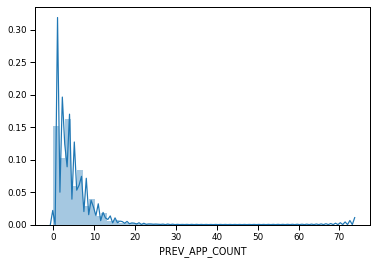

In [155]:
sns.distplot(merged_df['PREV_APP_COUNT'])

We can see , most of the clients have applied the application 4 times

In [156]:
#Lets aggregate the numerical variables like mean for a given single applicant. 
#P.s- Categorical variables can be pre-processed with techniques like One hot, for variables like contract_status and then merged with app_data by mean() but for now we have merged continuous data

new_group = prev_data.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in new_group.columns ]
new_group.columns = prev_columns
merged_df = merged_df.merge(new_group, on =['SK_ID_CURR'], how = 'left')
merged_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,PREV_APP_COUNT,PREV_AMT_ANNUITY,PREV_AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_HOUR_APPR_PROCESS_START,PREV_NFLAG_LAST_APPL_IN_DAY,PREV_DAYS_DECISION,PREV_SELLERPLACE_AREA,PREV_CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648,2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,Morning,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,25,Young Adult,1.0,9251.775,179055.00,179055.00,179055.00,9.000000,1.0,-606.000000,500.000000,24.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,Morning,Same,Same,Same,Same,Same,Same,School,0.622246,1.0,0.0,1.0,0.0,828,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,45,Elderly,3.0,56553.990,435436.50,484191.00,435436.50,14.666667,1.0,-1305.000000,533.000000,10.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260,2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,Morning,Same,Same,Same,Same,Same,Same,Government,0.555912,0.0,0.0,0.0,0.0,815,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,52,Elderly,1.0,5357.250,24282.00,20106.00,24282.00,5.000000,1.0,-815.000000,30.000000,4.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,9833,2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,Evening,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,52,Elderly,9.0,23651.175,272203.26,291695.50,408304.89,14.666667,1.0,-272.444444,894.222222,23.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,4311,3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,Morning,Same,Same,Same,Same,Different,Different,Religion,0.322738,0.0,0.0,0.0,0.0,1106,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,54,Elderly,6.0,12278.805,150530.25,166638.75,150530.25,12.333333,1.0,-1222.833333,409.166667,20.666667


In [157]:
(merged_df.isnull().sum()*100/len(merged_df)).sort_values(ascending=False).head(60)

PREV_AMT_GOODS_PRICE            5.456331
PREV_AMT_ANNUITY                5.273096
PREV_CNT_PAYMENT                5.272439
PREV_SELLERPLACE_AREA           5.138132
PREV_DAYS_DECISION              5.138132
PREV_NFLAG_LAST_APPL_IN_DAY     5.138132
PREV_HOUR_APPR_PROCESS_START    5.138132
PREV_AMT_CREDIT                 5.138132
PREV_AMT_APPLICATION            5.138132
HOUR_APPR_PROCESS_START         0.013135
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
DAYS_REGISTRATION               0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
CNT_FAM_MEMBERS                 0.000000
OCCUPATION_TYPE                 0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_MOBIL      

In [158]:
#Lets drop the rows with missing values  ,current shape of dataframe = 304531, 83
merged_df.dropna(inplace=True)

In [159]:
#retained rows in the dataset

(len(merged_df)/304531)*100

94.4672299371821

In [160]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,PREV_APP_COUNT,PREV_AMT_ANNUITY,PREV_AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_HOUR_APPR_PROCESS_START,PREV_NFLAG_LAST_APPL_IN_DAY,PREV_DAYS_DECISION,PREV_SELLERPLACE_AREA,PREV_CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648,2120,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,Morning,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,25,Young Adult,1.0,9251.775,179055.00,179055.00,179055.00,9.000000,1.0,-606.000000,500.000000,24.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,Morning,Same,Same,Same,Same,Same,Same,School,0.622246,1.0,0.0,1.0,0.0,828,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,45,Elderly,3.0,56553.990,435436.50,484191.00,435436.50,14.666667,1.0,-1305.000000,533.000000,10.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260,2531,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,Morning,Same,Same,Same,Same,Same,Same,Government,0.555912,0.0,0.0,0.0,0.0,815,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,52,Elderly,1.0,5357.250,24282.00,20106.00,24282.00,5.000000,1.0,-815.000000,30.000000,4.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,9833,2437,Y,Y,N,Y,N,N,Laborers,2.0,2,2,WEDNESDAY,Evening,Same,Same,Same,Same,Same,Same,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,1,52,Elderly,9.0,23651.175,272203.26,291695.50,408304.89,14.666667,1.0,-272.444444,894.222222,23.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,4311,3458,Y,Y,N,Y,N,N,Core staff,1.0,2,2,THURSDAY,Morning,Same,Same,Same,Same,Different,Different,Religion,0.322738,0.0,0.0,0.0,0.0,1106,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0,0,0,0,0,0,54,Elderly,6.0,12278.805,150530.25,166638.75,150530.25,12.333333,1.0,-1222.833333,409.166667,20.666667


In [161]:
#check if the merge is correct
#We know sk_id_curr- 100003 has applied 2 times in the past from the above dataframe, Lets check

prev_data[prev_data['SK_ID_CURR']==100003]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest


In [162]:
#turning the days into positive

merged_df['PREV_DAYS_DECISION'] = abs(merged_df['PREV_DAYS_DECISION'])

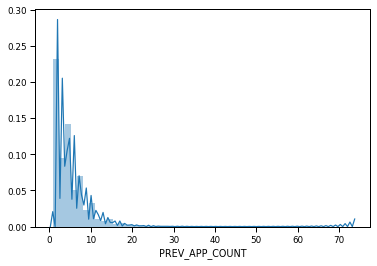

In [163]:
#4 is the average number of times people have applied in the past

sns.distplot(merged_df['PREV_APP_COUNT'])

# Analysis of the merged frame


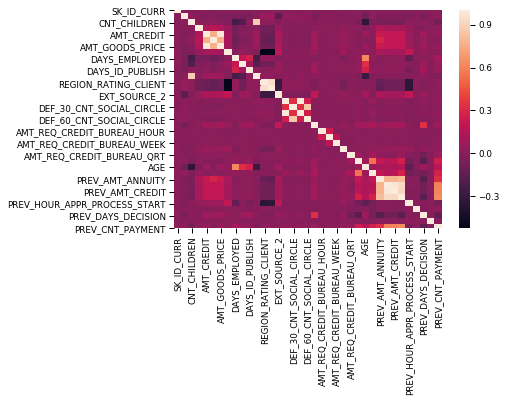

In [164]:
sns.heatmap(merged_df.corr())

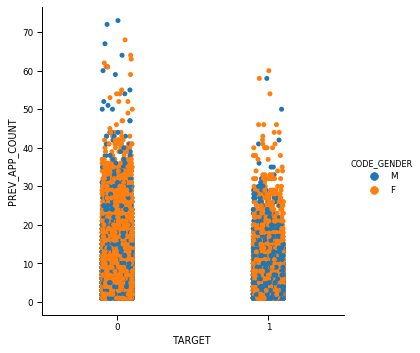

In [165]:
sns.catplot(x="TARGET", y="PREV_APP_COUNT",hue='CODE_GENDER',  data=merged_df)

One interesting observation, if number of past loan application is less than say 30, theres a chance he/she might default specially female category

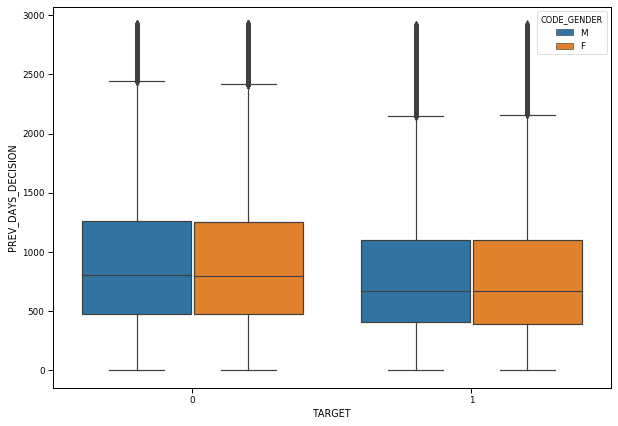

In [166]:
plt.figure(figsize=(10,7))
sns.boxplot(x='TARGET',y='PREV_DAYS_DECISION',hue='CODE_GENDER',data = merged_df,whis=1.5)
plt.show()

Median and spread almost same, hence day of last application holds no importance

<Figure size 792x504 with 0 Axes>

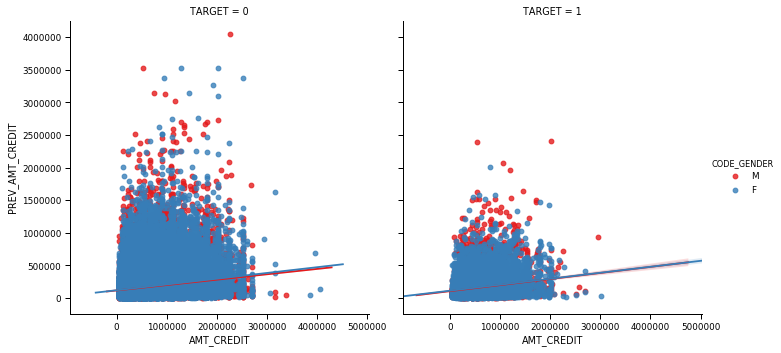

In [167]:
plt.figure(figsize=(11,7))
sns.lmplot(y='PREV_AMT_CREDIT',x='AMT_CREDIT',data=merged_df,hue='CODE_GENDER',
           col='TARGET',palette='Set1')

No major change is being observed from average past credit amount to present application's amount in both the cases. Hence previous loan amount can't decide if the candidate is going to default.

Some major variables detected - Age, credit amount, candidate's assets, document 3 submissions, credit score 2, gender and number of past applications